## 사전 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 한글 폰트 설정 및 시각화 라이브러리 임포트

matplotlib에서 한글이 깨지는 현상을 방지하기 위해 나눔 폰트를 설치하고 설정합니다. 이후 필요한 시각화 라이브러리들을 임포트합니다.

**참고:** 폰트 설치 후 런타임 재시작이 필요할 수 있습니다. 런타임 재시작 후에도 동일한 셀을 다시 실행하여 폰트 설정을 활성화해야 합니다.

In [2]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# matplotlib 폰트 설정 (한글 깨짐 방지)
# Colab 환경에 설치된 나눔고딕 폰트 경로를 찾아서 설정합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name) # 전역 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### CSV 파일 불러오기

지정된 경로의 CSV 파일을 Pandas DataFrame으로 불러오고, 상위 5행을 출력하여 데이터를 확인합니다.

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/div..csv'
df = pd.read_csv(file_path)
display(df.head())

code        date  year  month  day         div_total div_per_stock  \
0  0030R0  2025-08-31  2025      8   31  4,371,412,500.00            73   
1  0030R0  2025-05-31  2025      5   31  2,914,275,000.00            98   
2  481850  2025-08-31  2025      8   31  5,521,663,328.00           127   
3  481850  2025-02-28  2025      2   28  5,521,663,328.00           127   
4  481850  2024-08-31  2024      8   31  5,478,185,664.00           126   

  div_per_stock_ytd div_yield  
0               171      0.15  
1                98       0.2  
2               254      0.13  
3               127      0.13  
4               126      0.13

## 박스플롯

### 'div_per_stock' 데이터 전처리 및 시각화

'div_per_stock' 열에 포함된 쉼표(,)를 제거하고, 숫자로 변환할 수 없는 값은 `NaN`으로 처리합니다. 이후 각 'code'별 'div_per_stock'의 분포를 박스 플롯으로 시각화합니다.

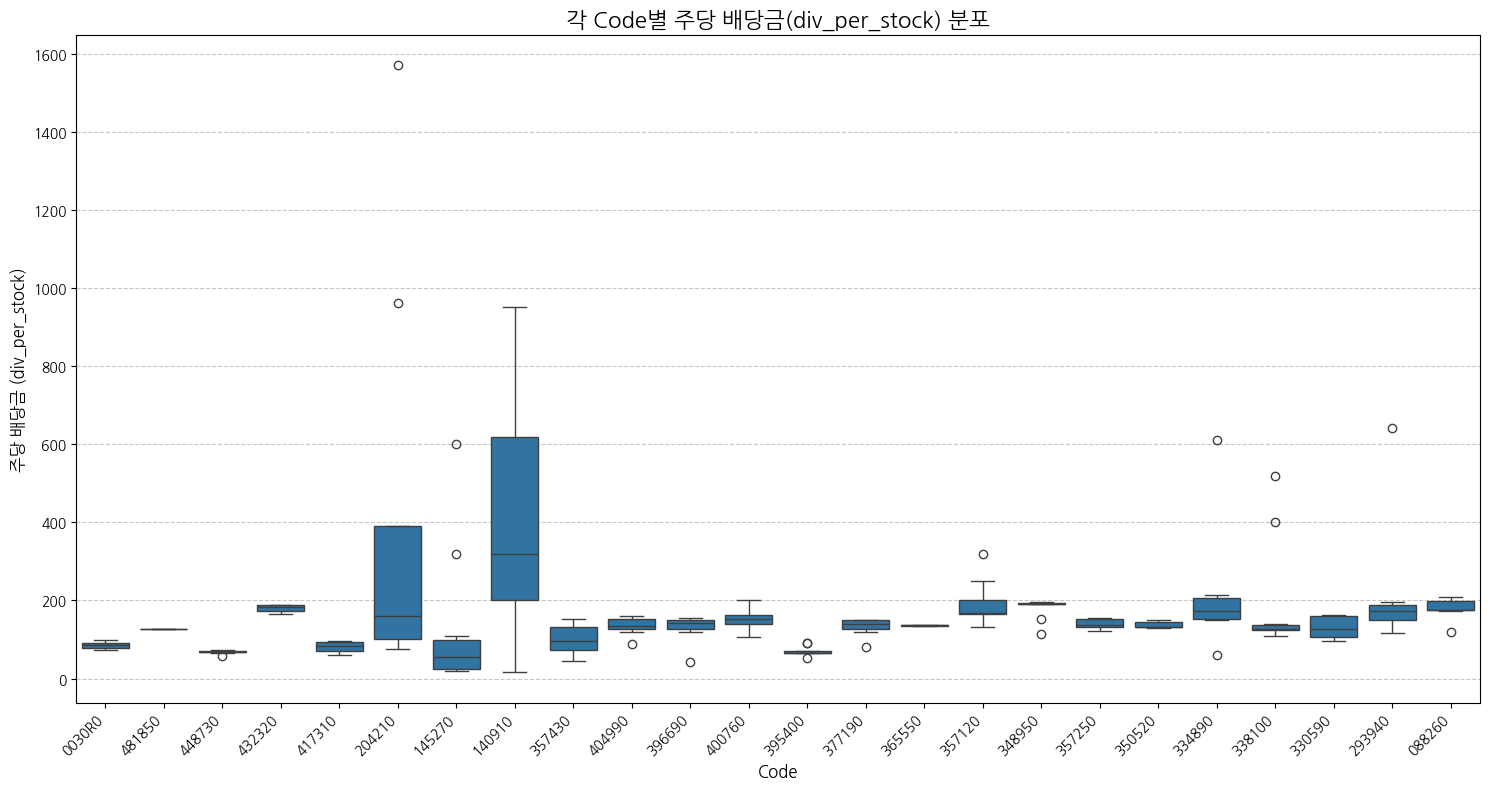

In [4]:
# 'div_per_stock' 열 전처리: 쉼표 제거 및 숫자로 변환 (오류 발생 시 NaN 처리)
df['div_per_stock'] = df['div_per_stock'].astype(str).str.replace(',', '', regex=False)
df['div_per_stock'] = pd.to_numeric(df['div_per_stock'], errors='coerce')

# 시각화: 각 'code'별 'div_per_stock' 분포를 박스 플롯으로 그립니다.
plt.figure(figsize=(15, 8)) # 플롯 크기 설정
sns.boxplot(x='code', y='div_per_stock', data=df)

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('각 Code별 주당 배당금(div_per_stock) 분포', fontsize=16)
plt.xlabel('Code', fontsize=12)
plt.ylabel('주당 배당금 (div_per_stock)', fontsize=12)

# x축 라벨 회전 (많은 Code가 있을 경우)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

## 주당 배당금 시계열 변화

### 'code'별 주당 배당금(div_per_stock) 시계열 시각화

'date' 열을 datetime 형식으로 변환하여 각 'code'별 주당 배당금의 시간 흐름에 따른 변화를 선 그래프로 시각화합니다.

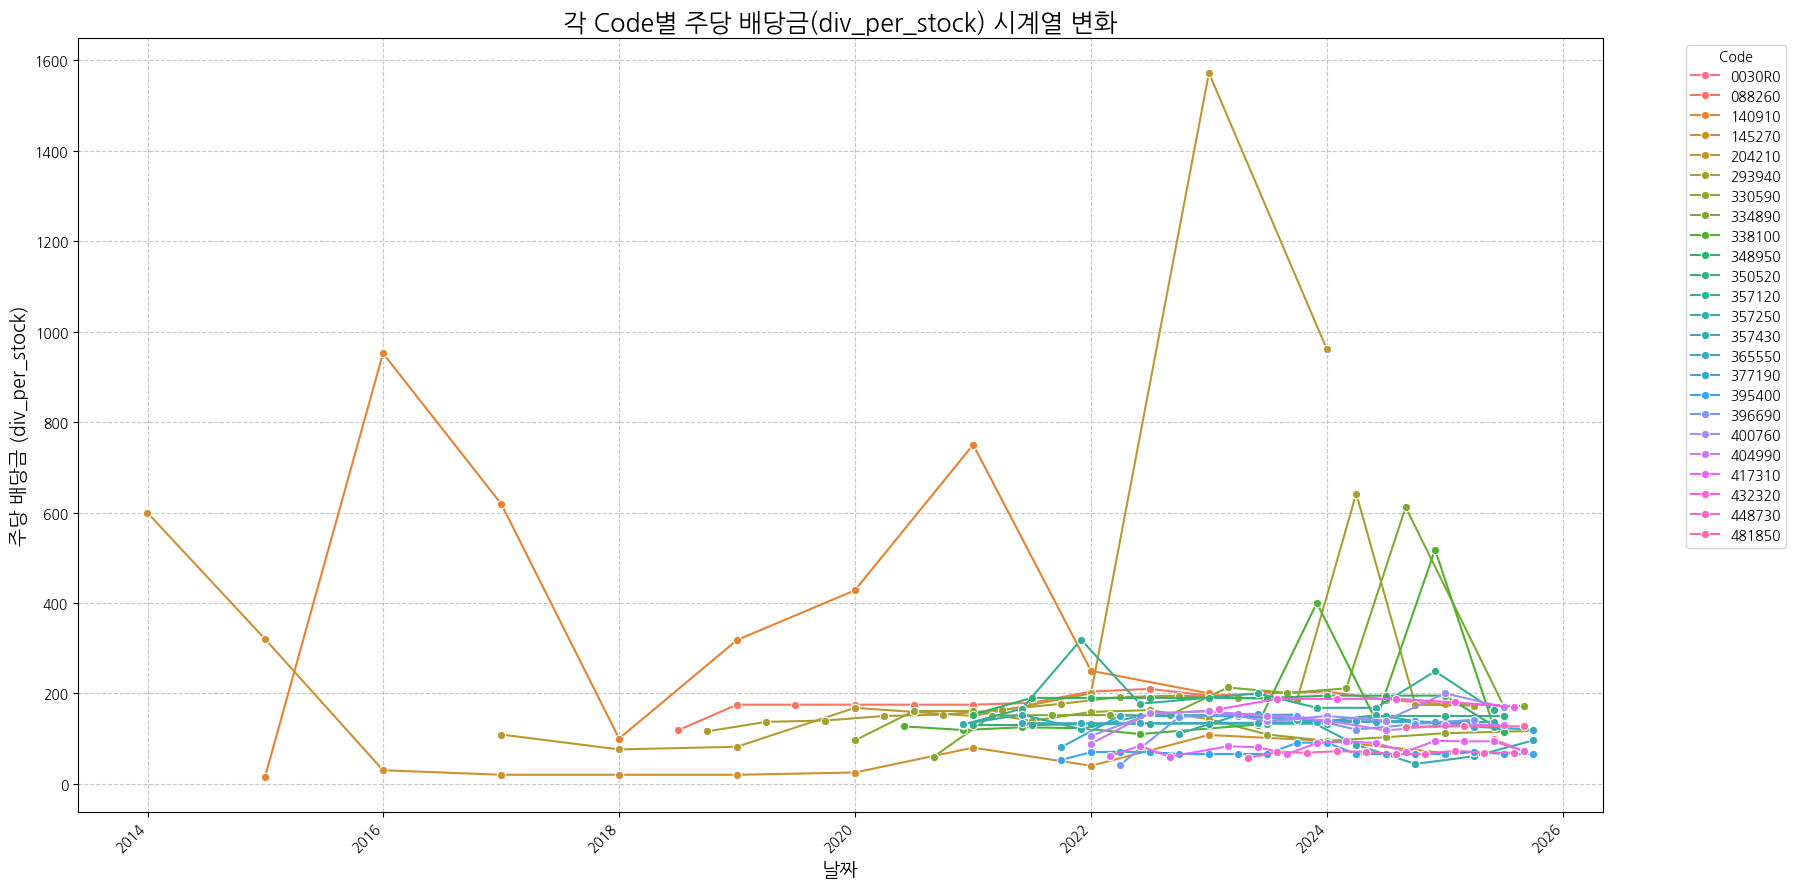

In [5]:
# 'date' 열을 datetime 형식으로 변환합니다.
df['date'] = pd.to_datetime(df['date'])

# 시계열 데이터를 날짜 순으로 정렬합니다.
df_sorted = df.sort_values(by=['code', 'date']).copy()

# 시각화: 각 'code'별 'div_per_stock' 시계열 그래프를 그립니다.
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock', hue='code', data=df_sorted, marker='o')

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('각 Code별 주당 배당금(div_per_stock) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('주당 배당금 (div_per_stock)', fontsize=14)

# x축 날짜 라벨을 보기 좋게 회전합니다.
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

### 'code'별 주당 배당금(div_per_stock) 300 초과 여부에 따른 그룹 분리 및 시계열 시각화

먼저, 전체 데이터에서 'div_per_stock'이 300을 한 번이라도 초과한 기록이 있는 'code'들을 식별합니다. 이 'code'들과 그렇지 않은 'code'들을 분리하여 각각의 시계열 변화를 두 개의 차트로 시각화합니다.

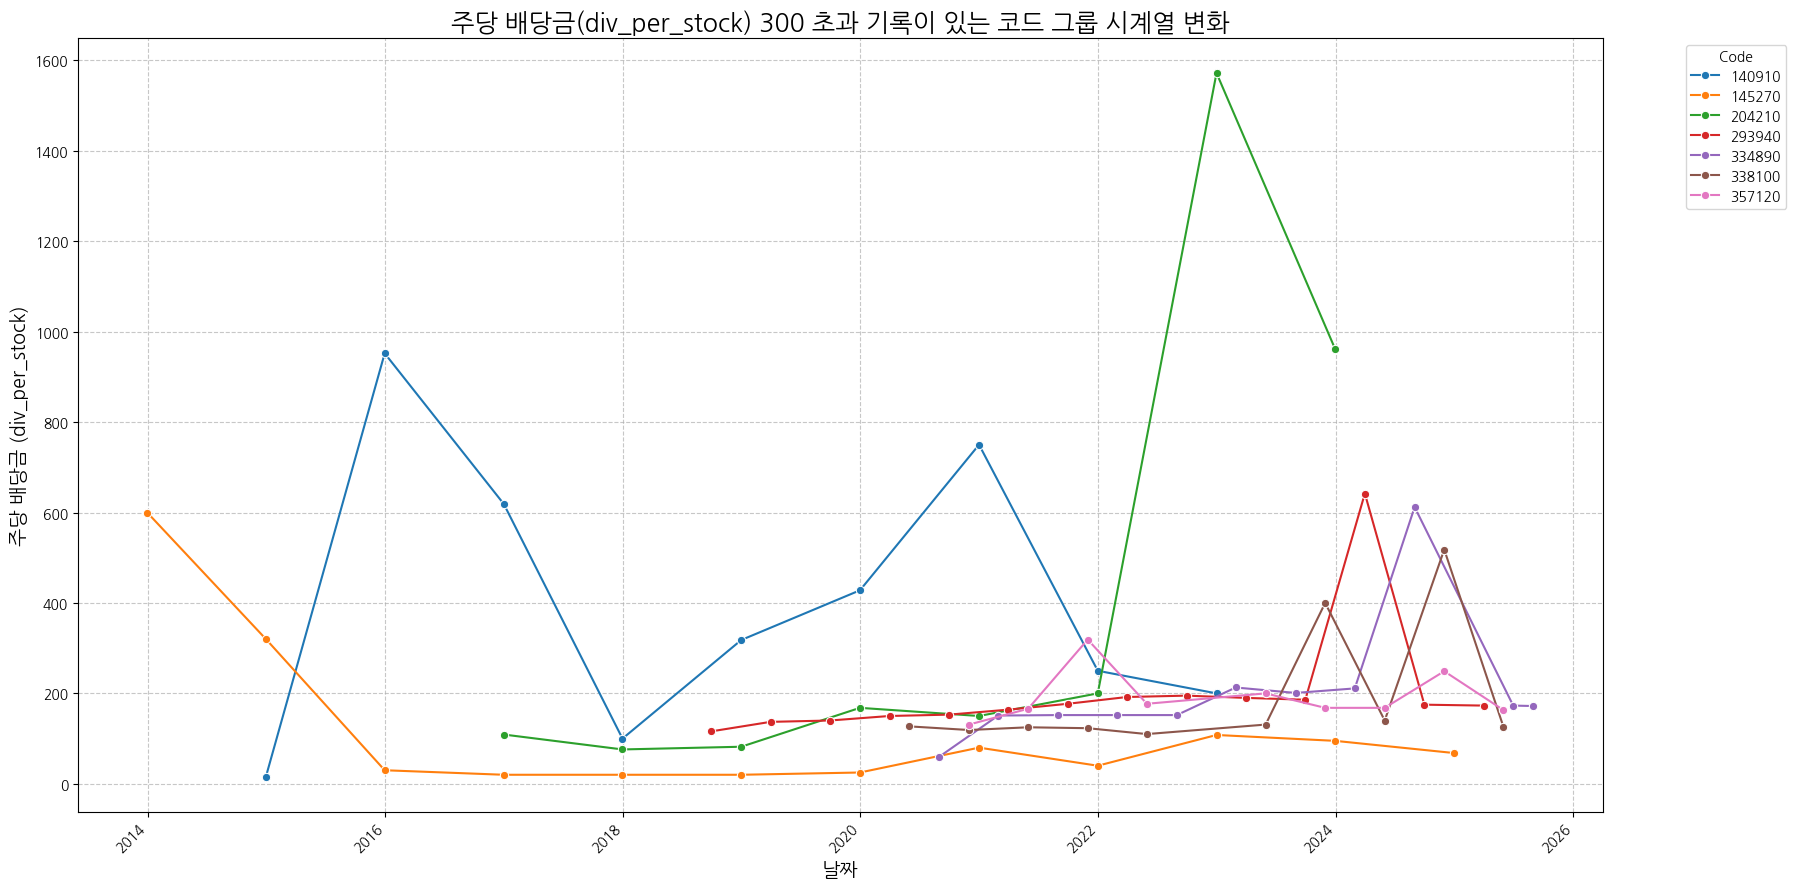

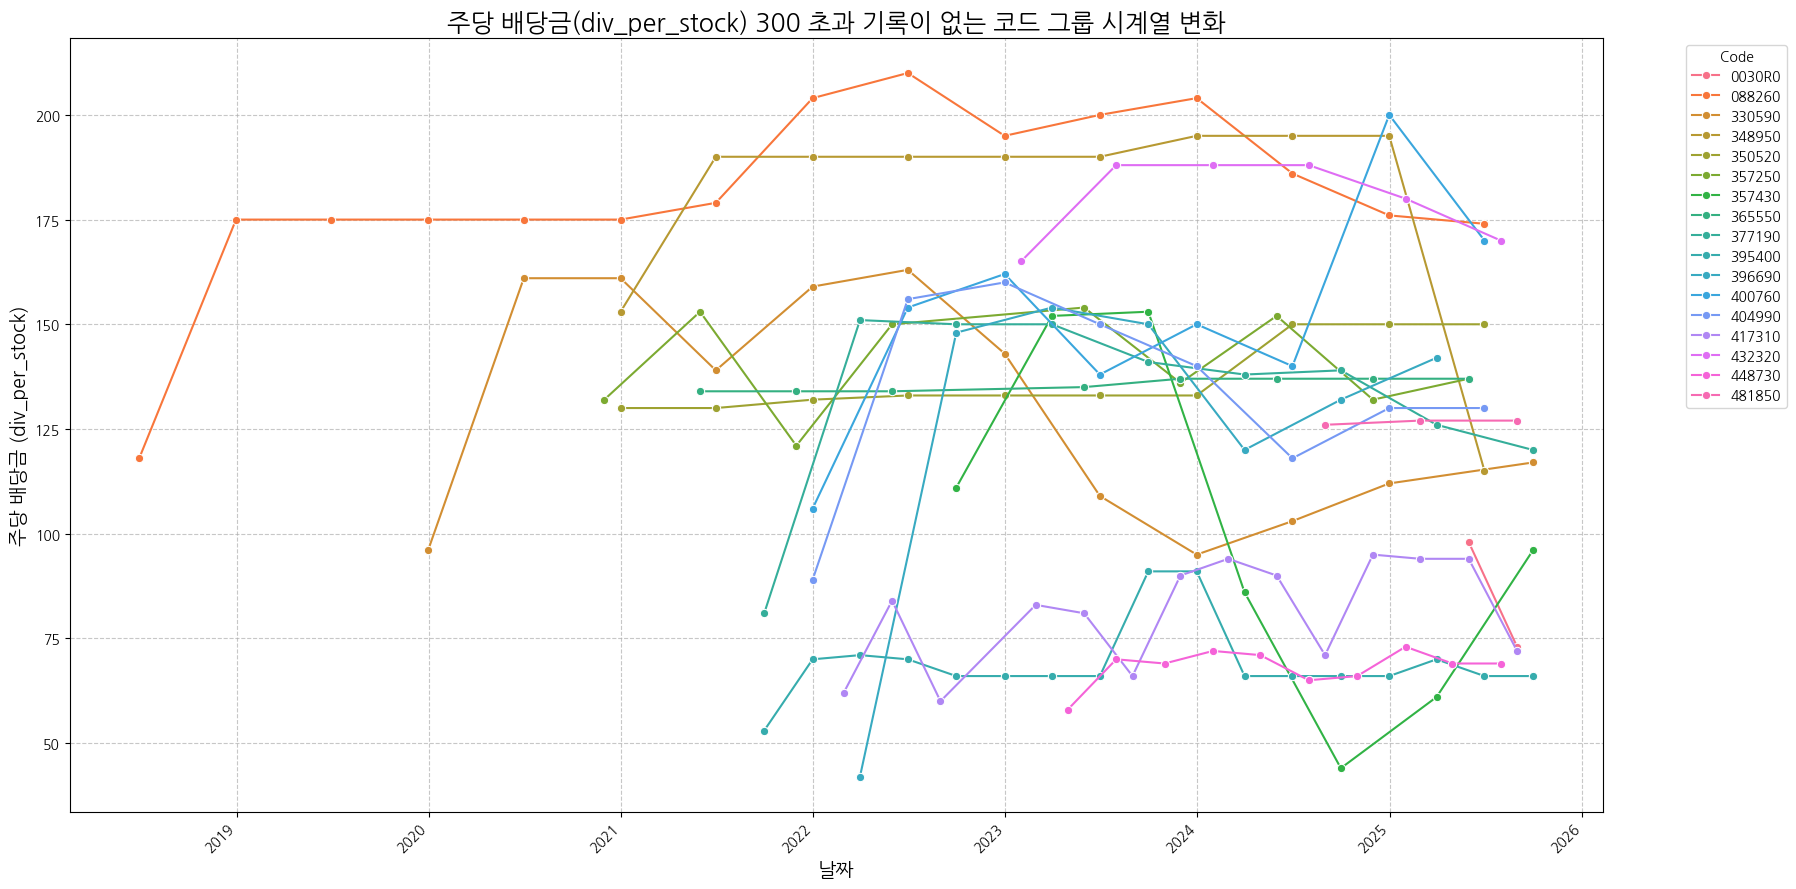

In [6]:
# 'div_per_stock'이 300을 초과하는 모든 'code'들을 찾습니다.
codes_over_300 = df_sorted[df_sorted['div_per_stock'] > 300]['code'].unique()

# 'div_per_stock'이 300을 한 번이라도 초과한 'code'들의 전체 데이터
df_high_div_codes = df_sorted[df_sorted['code'].isin(codes_over_300)].copy()

# 'div_per_stock'이 300을 한 번도 초과하지 않은 'code'들의 전체 데이터
df_low_div_codes = df_sorted[~df_sorted['code'].isin(codes_over_300)].copy()

# --- 첫 번째 차트: 주당 배당금 300 초과 기록이 있는 코드 그룹 ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock', hue='code', data=df_high_div_codes, marker='o')

plt.title('주당 배당금(div_per_stock) 300 초과 기록이 있는 코드 그룹 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('주당 배당금 (div_per_stock)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 두 번째 차트: 주당 배당금 300 초과 기록이 없는 코드 그룹 ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock', hue='code', data=df_low_div_codes, marker='o')

plt.title('주당 배당금(div_per_stock) 300 초과 기록이 없는 코드 그룹 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('주당 배당금 (div_per_stock)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 각 Code별 주당 배당금(div_per_stock) 정규화 및 시계열 시각화

각 'code'별 'div_per_stock'을 0과 1 사이로 Min-Max 정규화(최소값을 0, 최대값을 1로)합니다. 이후 정규화된 값을 사용하여 시계열 그래프를 그려 각 'code'의 상대적인 배당금 추이를 비교합니다.

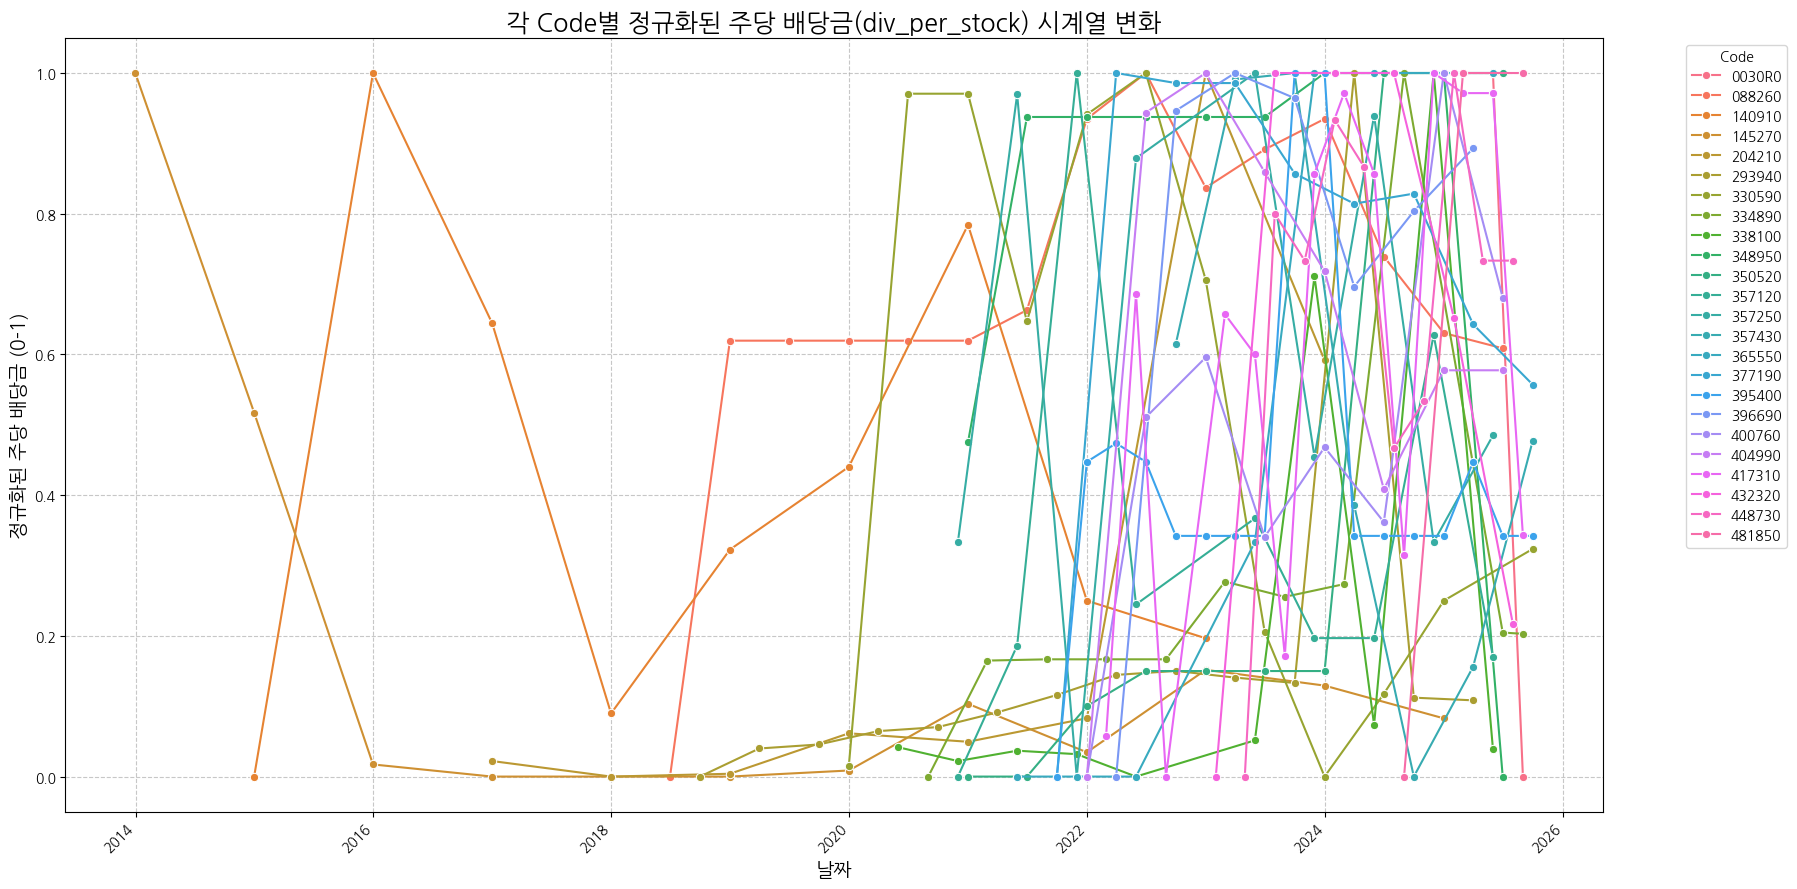

In [7]:
# 각 'code'별 'div_per_stock'을 0에서 1 사이로 정규화하는 함수 정의
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val: # 모든 값이 동일할 경우 0 또는 NaN으로 처리 (여기서는 0)
        return pd.Series(0, index=series.index)
    return (series - min_val) / (max_val - min_val)

# 'code'별로 그룹화하여 'div_per_stock' 열에 정규화 함수 적용
df_sorted['normalized_div_per_stock'] = df_sorted.groupby('code')['div_per_stock'].transform(min_max_normalize)

# 시각화: 각 'code'별 정규화된 'div_per_stock' 시계열 그래프를 그립니다.
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='normalized_div_per_stock', hue='code', data=df_sorted, marker='o')

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('각 Code별 정규화된 주당 배당금(div_per_stock) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('정규화된 주당 배당금 (0-1)', fontsize=14)

# x축 날짜 라벨을 보기 좋게 회전합니다.
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

## 연간 누적 배당금 변화

### 'code'별 연간 주당 배당금(div_per_stock_ytd) 시계열 시각화

'date' 열을 기준으로 각 'code'별 'div_per_stock_ytd' (연초 대비 주당 배당금)의 시계열 변화를 선 그래프로 시각화합니다. 먼저 'div_per_stock_ytd' 열을 숫자로 변환하는 전처리를 수행합니다.

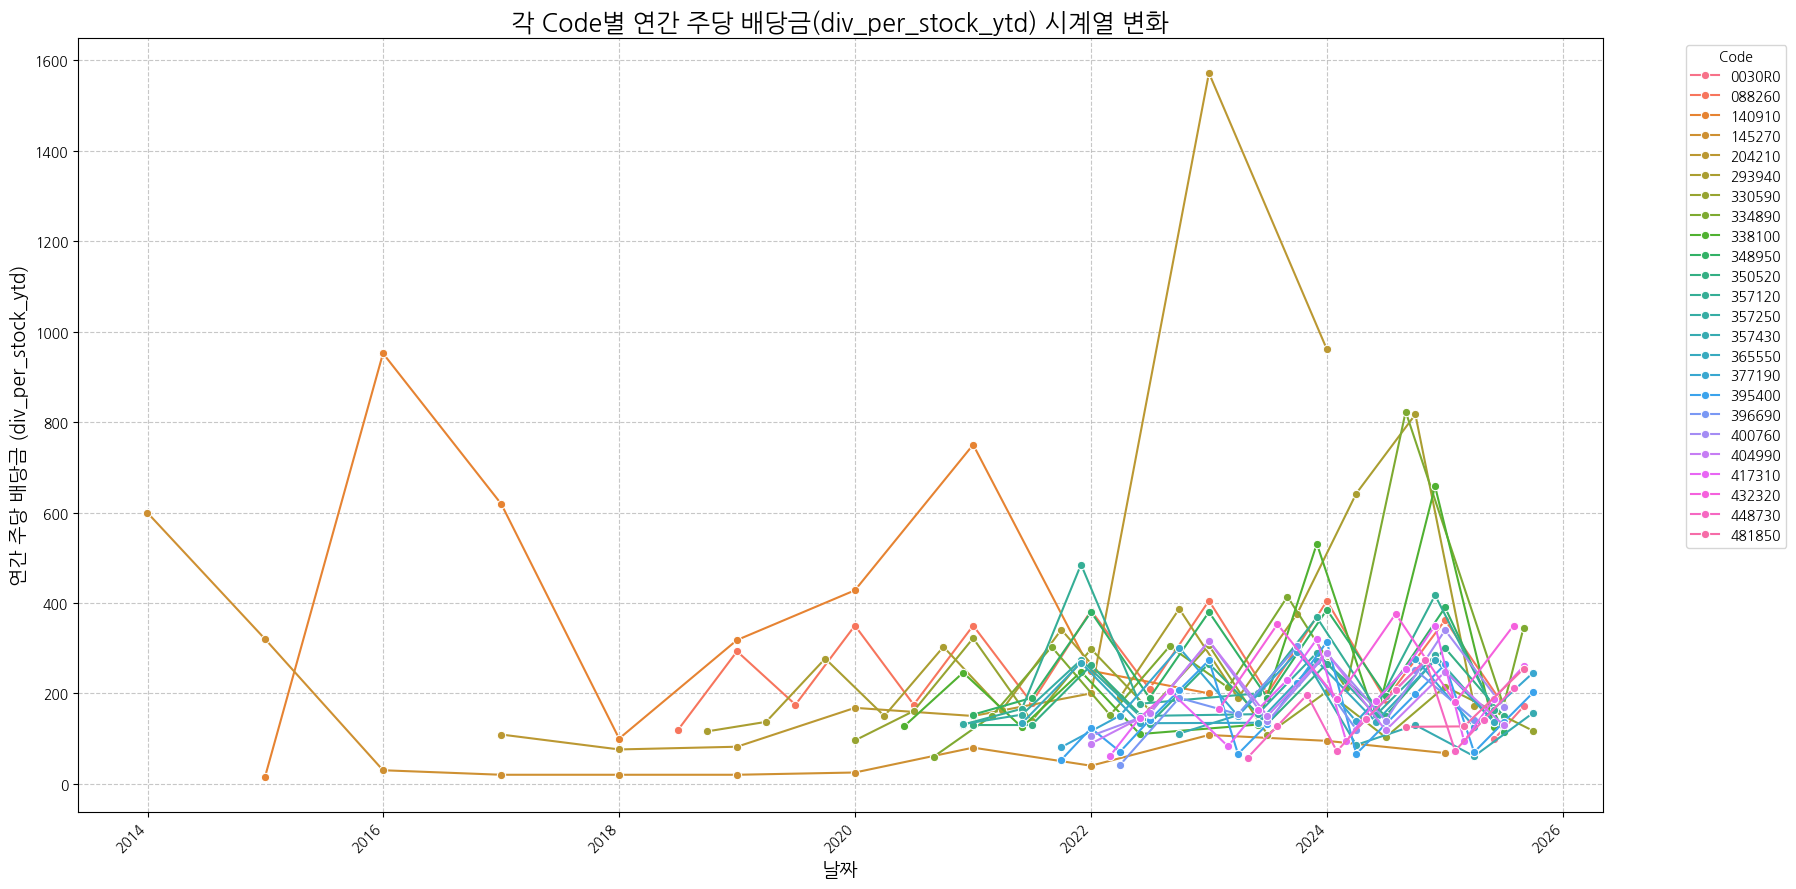

In [8]:
# 'div_per_stock_ytd' 열 전처리: 쉼표 제거 및 숫자로 변환 (오류 발생 시 NaN 처리)
df_sorted['div_per_stock_ytd'] = df_sorted['div_per_stock_ytd'].astype(str).str.replace(',', '', regex=False)
df_sorted['div_per_stock_ytd'] = pd.to_numeric(df_sorted['div_per_stock_ytd'], errors='coerce')

# 시각화: 각 'code'별 'div_per_stock_ytd' 시계열 그래프를 그립니다.
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock_ytd', hue='code', data=df_sorted, marker='o')

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('각 Code별 연간 주당 배당금(div_per_stock_ytd) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('연간 주당 배당금 (div_per_stock_ytd)', fontsize=14)

# x축 날짜 라벨을 보기 좋게 회전합니다.
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

### 'code'별 연간 주당 배당금(div_per_stock_ytd) 2016년 이전 데이터 유무에 따른 그룹 분리 및 시계열 시각화

'div_per_stock_ytd' 데이터 중 2017년 이전 기록이 있는 'code'들을 식별하고, 이 'code'들과 그렇지 않은 'code'들을 분리하여 각각의 시계열 변화를 두 개의 차트로 시각화합니다.

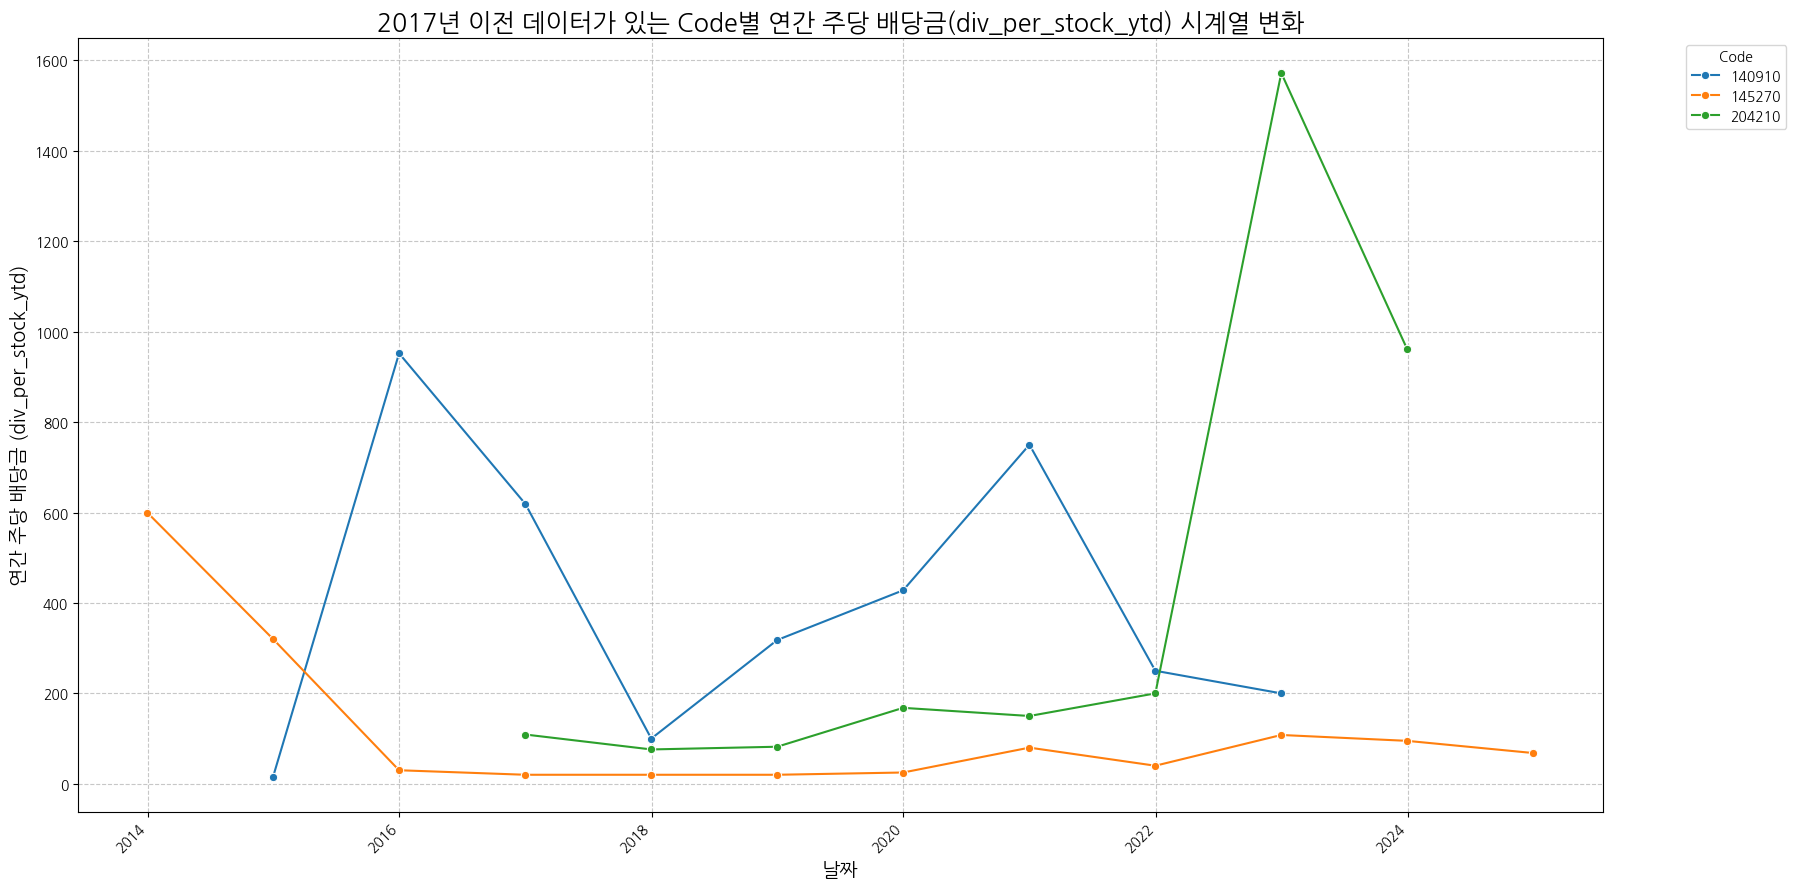

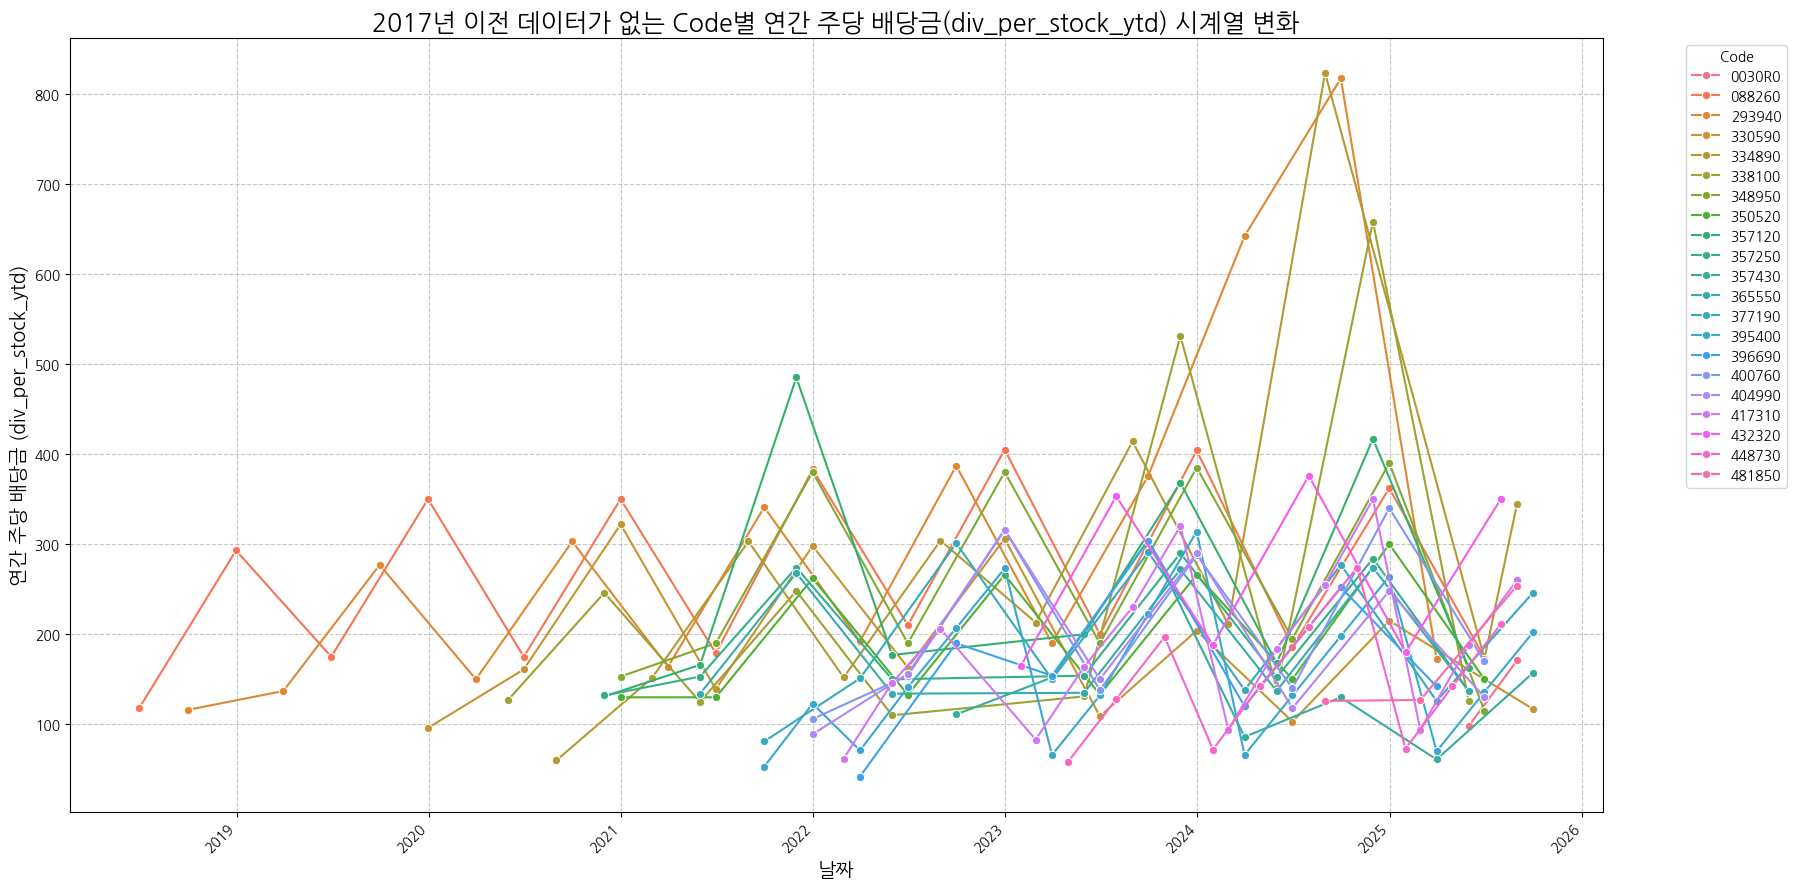

In [9]:
# 2017년 이전 데이터가 있는 'code'들을 찾습니다.
codes_pre_2016 = df_sorted[df_sorted['date'].dt.year < 2017]['code'].unique()

# 2017년 이전 데이터가 있는 'code'들의 전체 데이터
df_has_pre_2016_data = df_sorted[df_sorted['code'].isin(codes_pre_2016)].copy()

# 2017년 이전 데이터가 없는 'code'들의 전체 데이터
df_no_pre_2016_data = df_sorted[~df_sorted['code'].isin(codes_pre_2016)].copy()

# --- 첫 번째 차트: 2017년 이전 데이터가 있는 코드 그룹 ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock_ytd', hue='code', data=df_has_pre_2016_data, marker='o')

plt.title('2017년 이전 데이터가 있는 Code별 연간 주당 배당금(div_per_stock_ytd) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('연간 주당 배당금 (div_per_stock_ytd)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 두 번째 차트: 2017년 이전 데이터가 없는 코드 그룹 ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock_ytd', hue='code', data=df_no_pre_2016_data, marker='o')

plt.title('2017년 이전 데이터가 없는 Code별 연간 주당 배당금(div_per_stock_ytd) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('연간 주당 배당금 (div_per_stock_ytd)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 각 Code별 연간 주당 배당금(div_per_stock_ytd) 정규화 및 시계열 시각화

각 'code'별 'div_per_stock_ytd'를 0과 1 사이로 Min-Max 정규화(최소값을 0, 최대값을 1로)합니다. 이후 정규화된 값을 사용하여 시계열 그래프를 그려 각 'code'의 상대적인 연간 배당금 추이를 비교합니다.

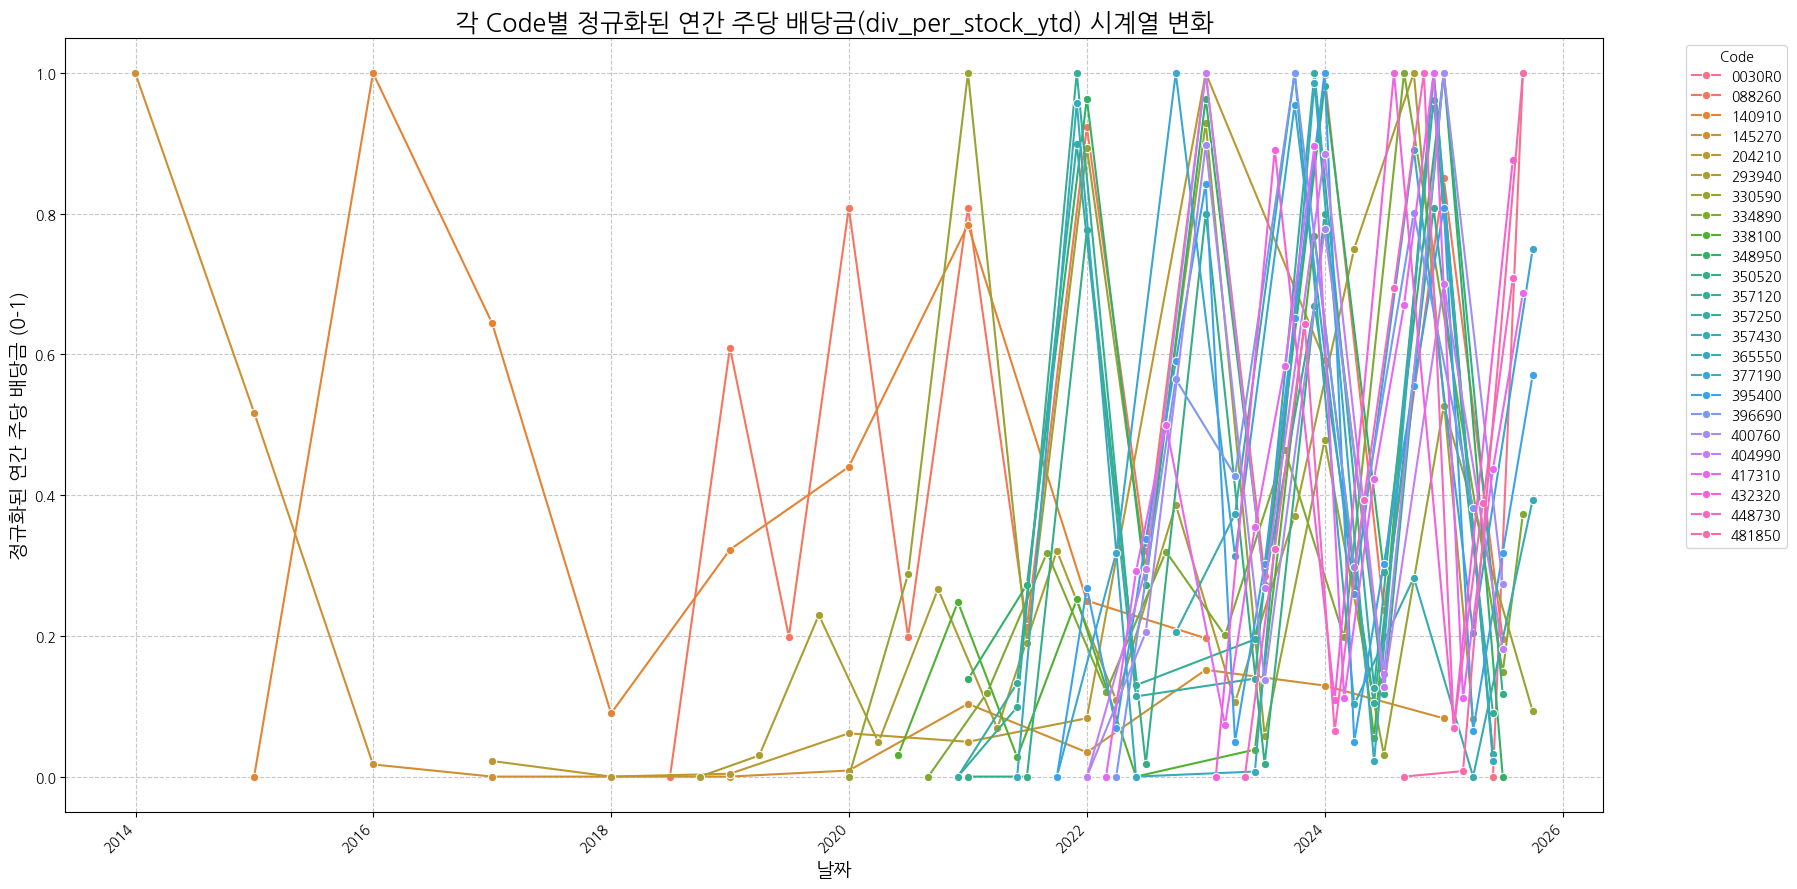

In [10]:
# 'div_per_stock_ytd' 열에 정규화 함수 적용
# min_max_normalize 함수는 이전 셀에서 정의되었습니다.
df_sorted['normalized_div_per_stock_ytd'] = df_sorted.groupby('code')['div_per_stock_ytd'].transform(min_max_normalize)

# 시각화: 각 'code'별 정규화된 'div_per_stock_ytd' 시계열 그래프를 그립니다.
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='normalized_div_per_stock_ytd', hue='code', data=df_sorted, marker='o')

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('각 Code별 정규화된 연간 주당 배당금(div_per_stock_ytd) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('정규화된 연간 주당 배당금 (0-1)', fontsize=14)

# x축 날짜 라벨을 보기 좋게 회전합니다.
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

## 연도별 총 배당금 변화

### 각 Code별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 시각화

'code'와 'year'별로 그룹화하여 `div_per_stock_ytd`의 최대값을 찾고, 이 최대값을 해당 연도의 날짜와 매칭하여 시계열로 시각화합니다. 이는 각 기업의 연도별 총 누적 배당금 중 가장 높은 값을 보여주어 연간 배당금 추이를 파악하는 데 유용합니다.

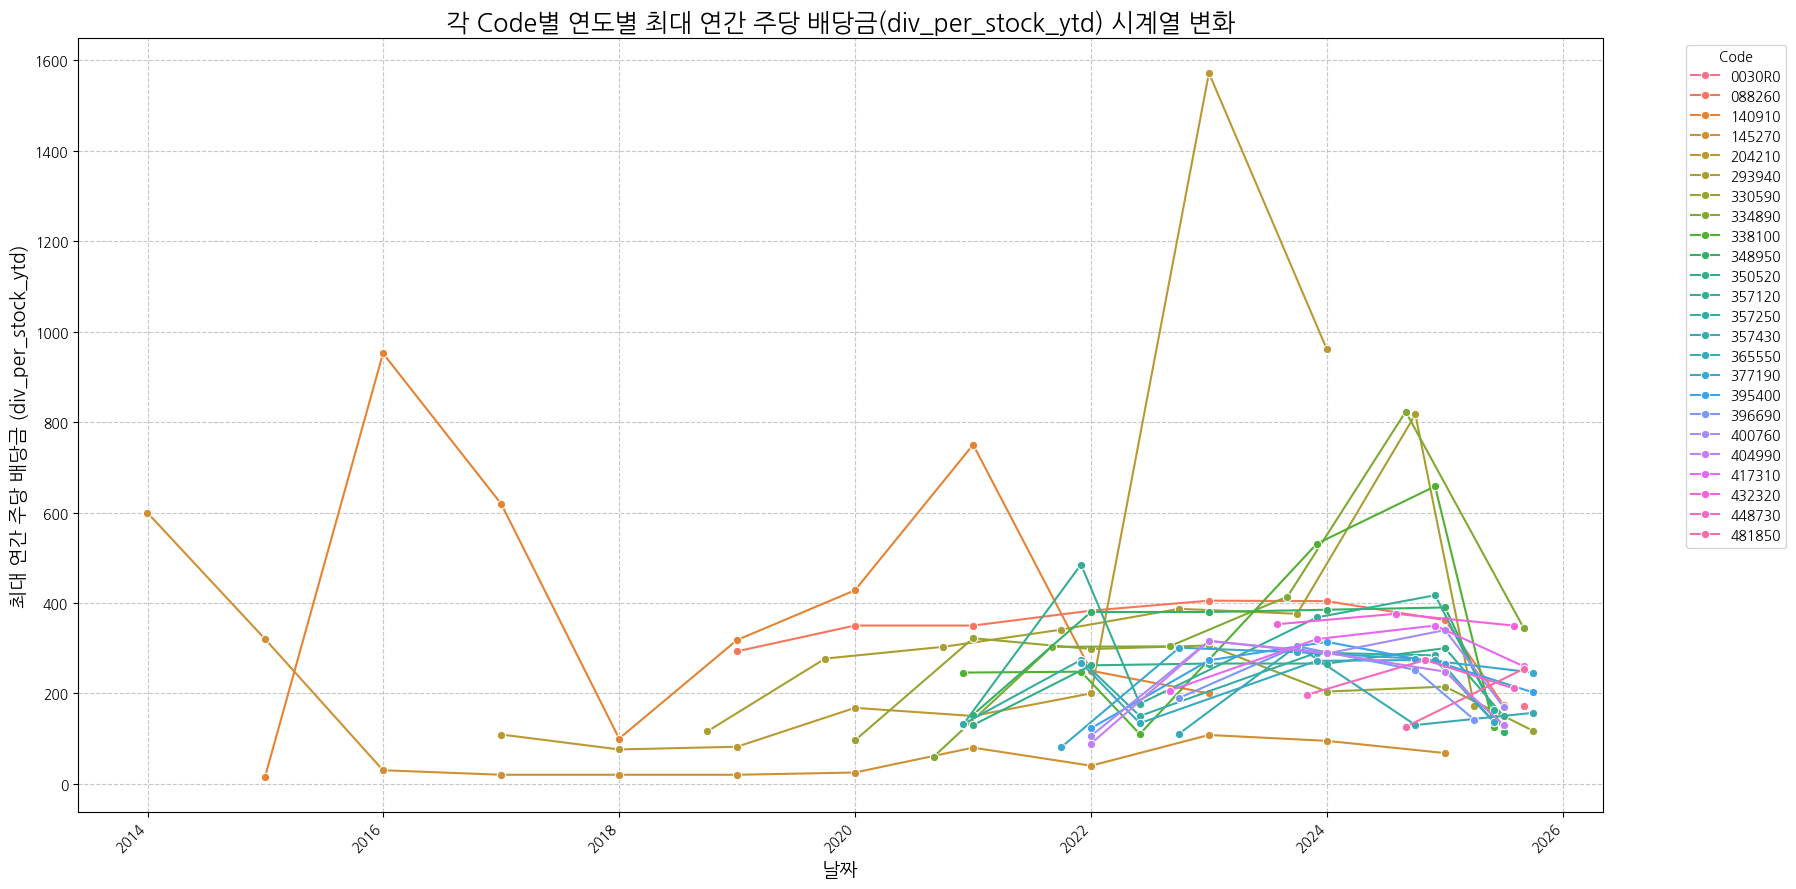

In [11]:
# 'code'와 'year'별로 그룹화하여 'div_per_stock_ytd'의 최대값을 찾고 해당 날짜를 가져옵니다.
# div_per_stock_ytd는 연간 누적값이므로, 해당 연도의 마지막 기록이 가장 큰 값을 가질 가능성이 높습니다.
# 따라서, 각 'code'와 'year' 그룹에서 'div_per_stock_ytd'가 최대인 행을 선택합니다.

# 각 그룹에서 div_per_stock_ytd가 최대인 인덱스를 찾습니다.
idx = df_sorted.groupby(['code', df_sorted['date'].dt.year])['div_per_stock_ytd'].idxmax()

# 해당 인덱스에 해당하는 행들을 선택하여 연간 최대 배당금 데이터프레임을 생성합니다.
df_annual_max_div_ytd = df_sorted.loc[idx].sort_values(by=['code', 'date']).copy()

# 시각화: 각 'code'별 연도별 최대 'div_per_stock_ytd' 시계열 그래프를 그립니다.
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock_ytd', hue='code', data=df_annual_max_div_ytd, marker='o')

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('각 Code별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('최대 연간 주당 배당금 (div_per_stock_ytd)', fontsize=14)

# x축 날짜 라벨을 보기 좋게 회전합니다.
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

### 'code'별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 2017년 이전 데이터 유무에 따른 그룹 분리 및 시계열 시각화

'df_annual_max_div_ytd' 데이터 중 2017년 이전 기록이 있는 'code'들을 식별하고, 이 'code'들과 그렇지 않은 'code'들을 분리하여 각각의 시계열 변화를 두 개의 차트로 시각화합니다.

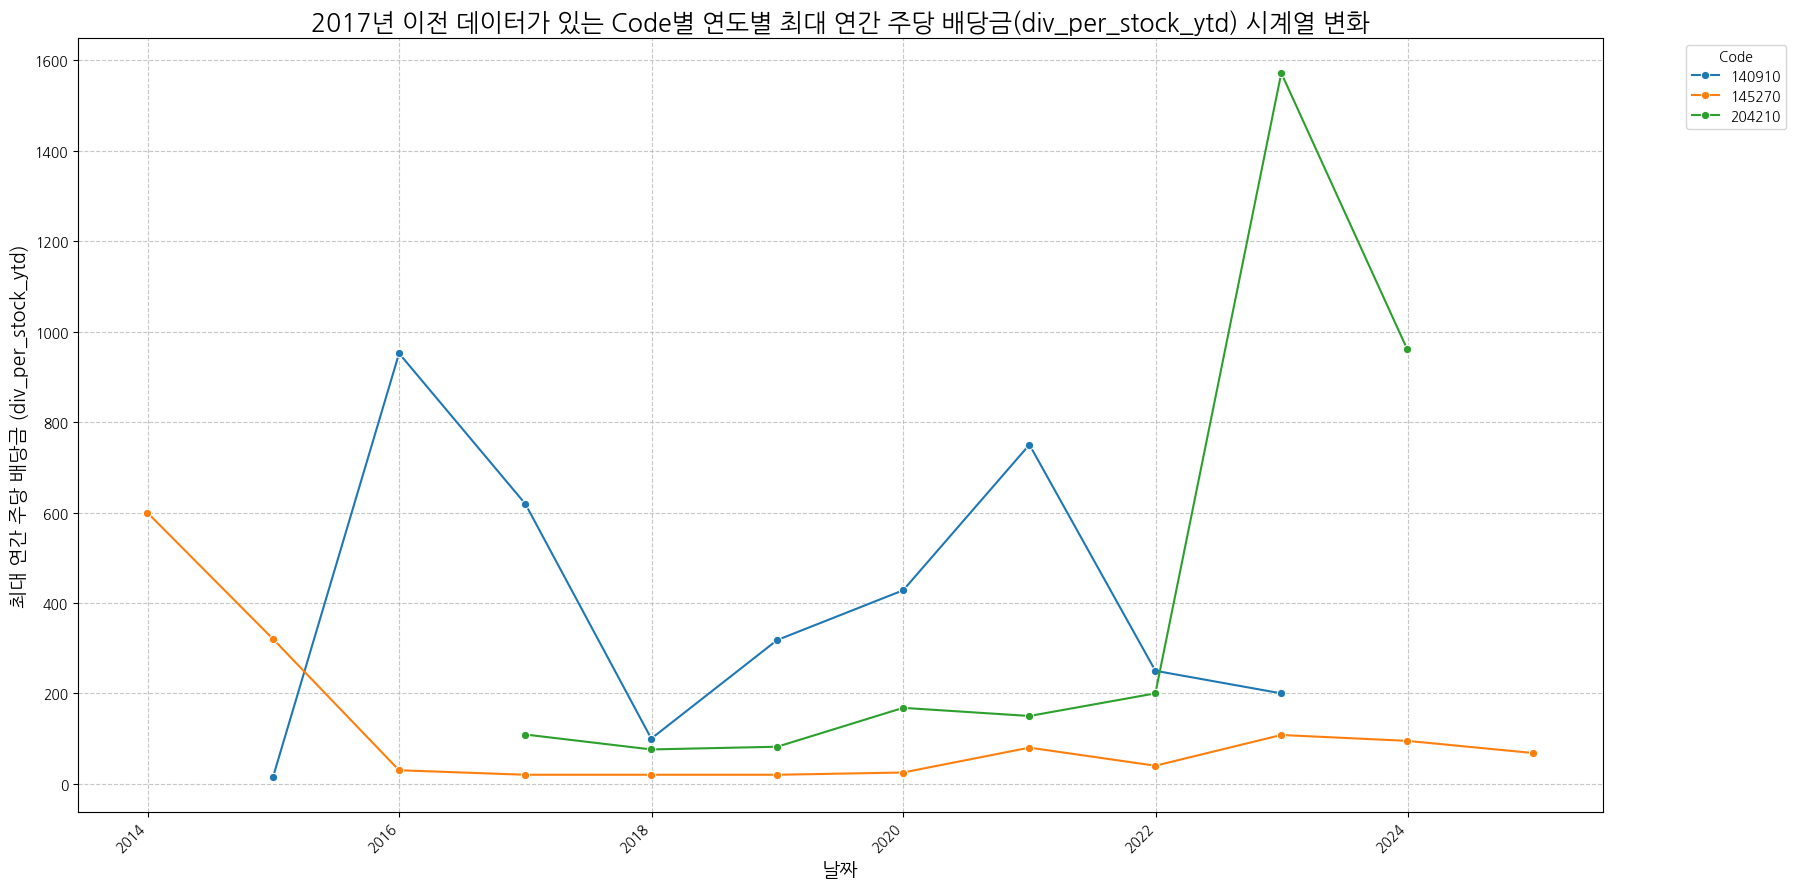

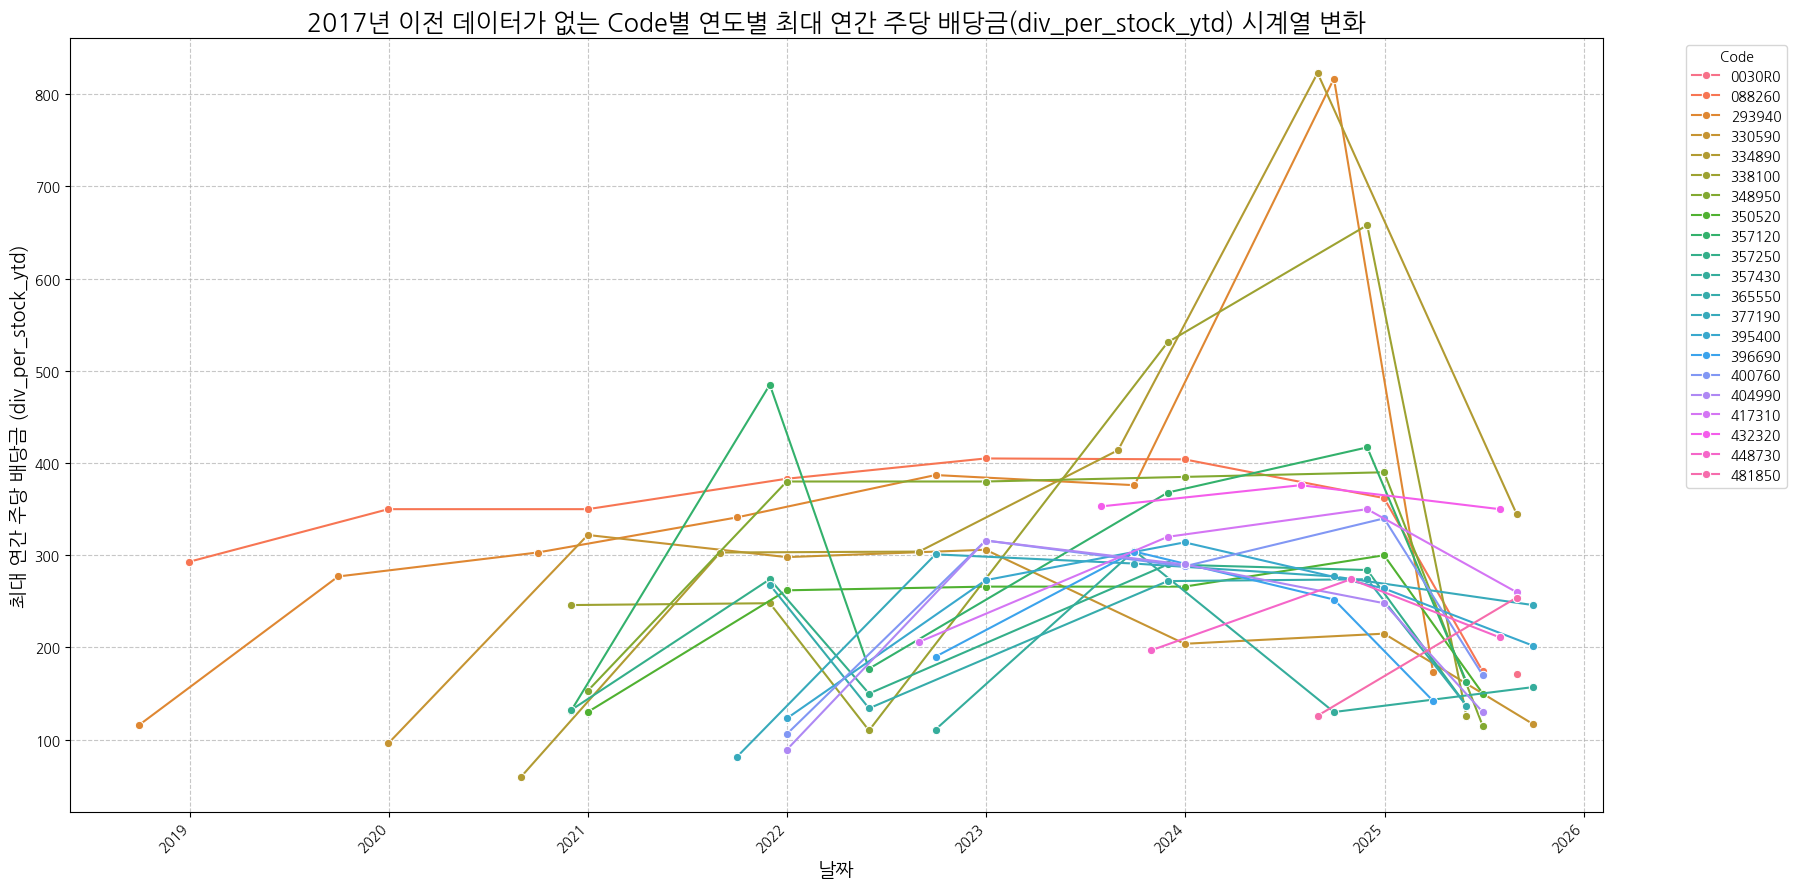

In [12]:
# 2017년 이전 데이터가 있는 'code'들을 찾습니다.
codes_pre_2017_annual_max = df_annual_max_div_ytd[df_annual_max_div_ytd['date'].dt.year < 2017]['code'].unique()

# 2017년 이전 데이터가 있는 'code'들의 전체 데이터 (연도별 최대값)
df_annual_max_has_pre_2017_data = df_annual_max_div_ytd[df_annual_max_div_ytd['code'].isin(codes_pre_2017_annual_max)].copy()

# 2017년 이전 데이터가 없는 'code'들의 전체 데이터 (연도별 최대값)
df_annual_max_no_pre_2017_data = df_annual_max_div_ytd[~df_annual_max_div_ytd['code'].isin(codes_pre_2017_annual_max)].copy()

# --- 첫 번째 차트: 2017년 이전 데이터가 있는 코드 그룹 (연도별 최대값) ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock_ytd', hue='code', data=df_annual_max_has_pre_2017_data, marker='o')

plt.title('2017년 이전 데이터가 있는 Code별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('최대 연간 주당 배당금 (div_per_stock_ytd)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 두 번째 차트: 2017년 이전 데이터가 없는 코드 그룹 (연도별 최대값) ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_per_stock_ytd', hue='code', data=df_annual_max_no_pre_2017_data, marker='o')

plt.title('2017년 이전 데이터가 없는 Code별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('최대 연간 주당 배당금 (div_per_stock_ytd)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 연도별 총 배당금 성장률 변화

### 각 Code별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 성장률 시각화

'df_annual_max_div_ytd' 데이터를 사용하여 각 'code'별 연도별 최대 연간 주당 배당금의 전년 대비 성장률을 계산하고, 이를 시계열 그래프로 시각화합니다.

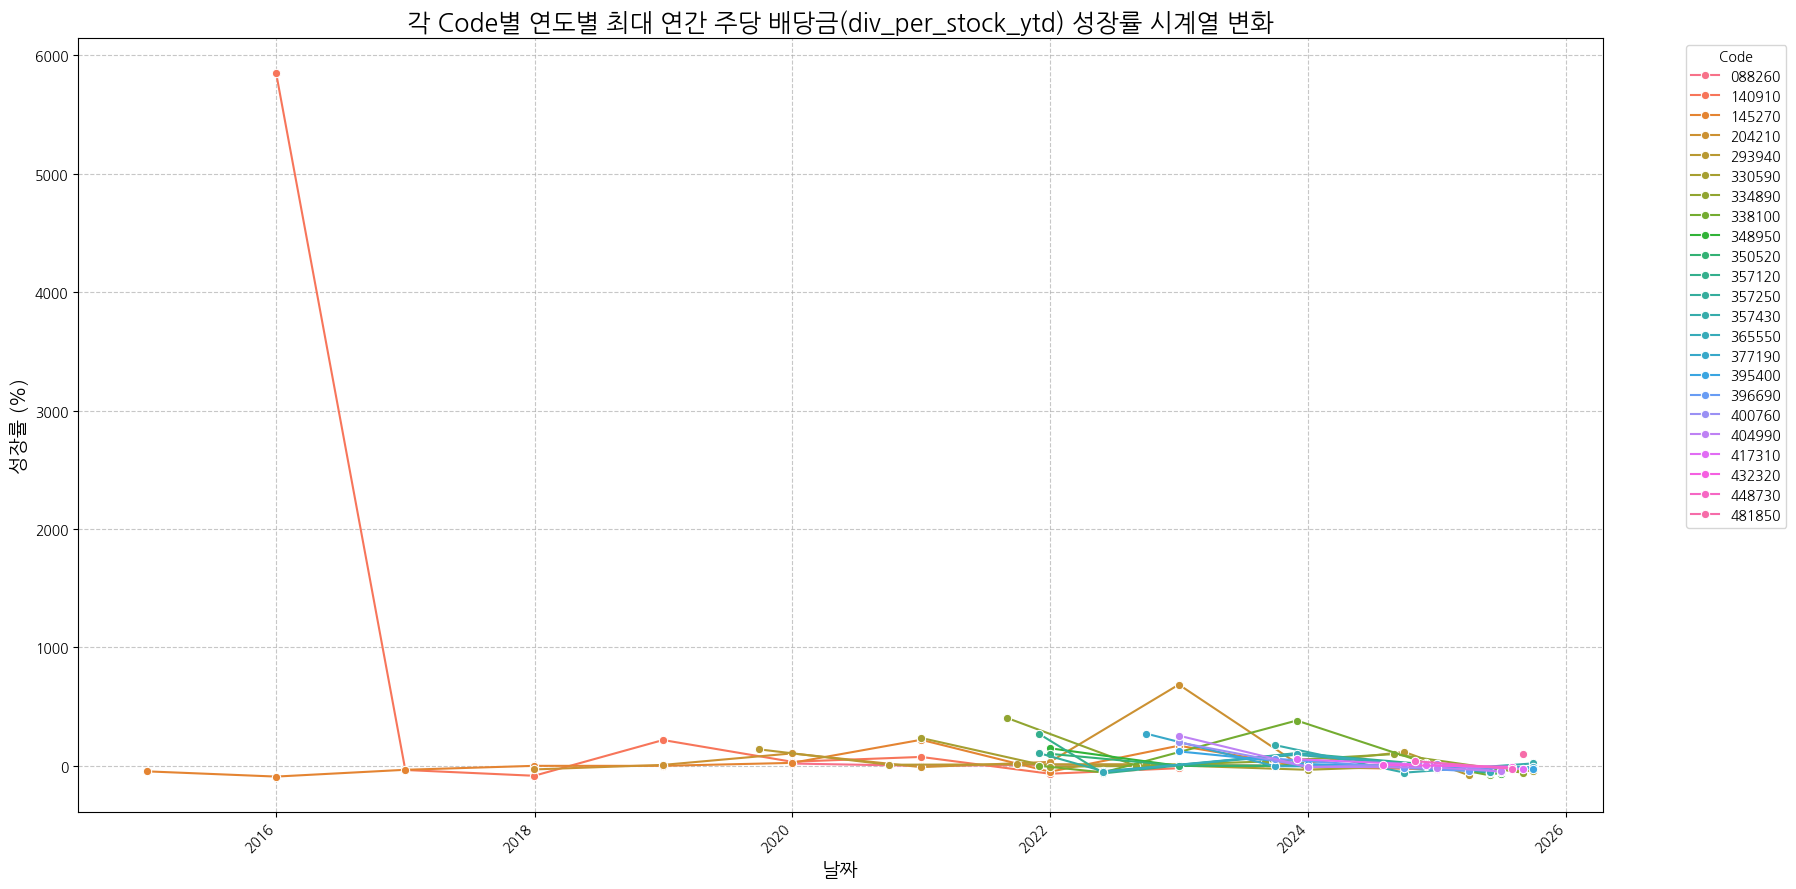

In [13]:
# 'code'별로 그룹화하여 'div_per_stock_ytd'의 전년 대비 성장률을 계산합니다.
# 첫 해의 성장률은 NaN이 됩니다.
df_annual_max_div_ytd['div_ytd_growth_rate'] = df_annual_max_div_ytd.groupby('code')['div_per_stock_ytd'].pct_change() * 100

# 성장률이 NaN인 행 (각 code의 첫 해 데이터)은 시각화에서 제외하기 위해 제거합니다.
df_growth_rate = df_annual_max_div_ytd.dropna(subset=['div_ytd_growth_rate']).copy()

# 시각화: 각 'code'별 연도별 최대 'div_per_stock_ytd' 성장률 시계열 그래프를 그립니다.
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_ytd_growth_rate', hue='code', data=df_growth_rate, marker='o')

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('각 Code별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 성장률 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)

# x축 날짜 라벨을 보기 좋게 회전합니다.
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

### 'code'별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 성장률 2018년 이전 데이터 유무에 따른 그룹 분리 및 시계열 시각화

'df_growth_rate' 데이터를 사용하여 2017년 이전 성장률 기록이 있는 'code'들을 식별하고, 이 'code'들과 그렇지 않은 'code'들을 분리하여 각각의 시계열 변화를 두 개의 차트로 시각화합니다.

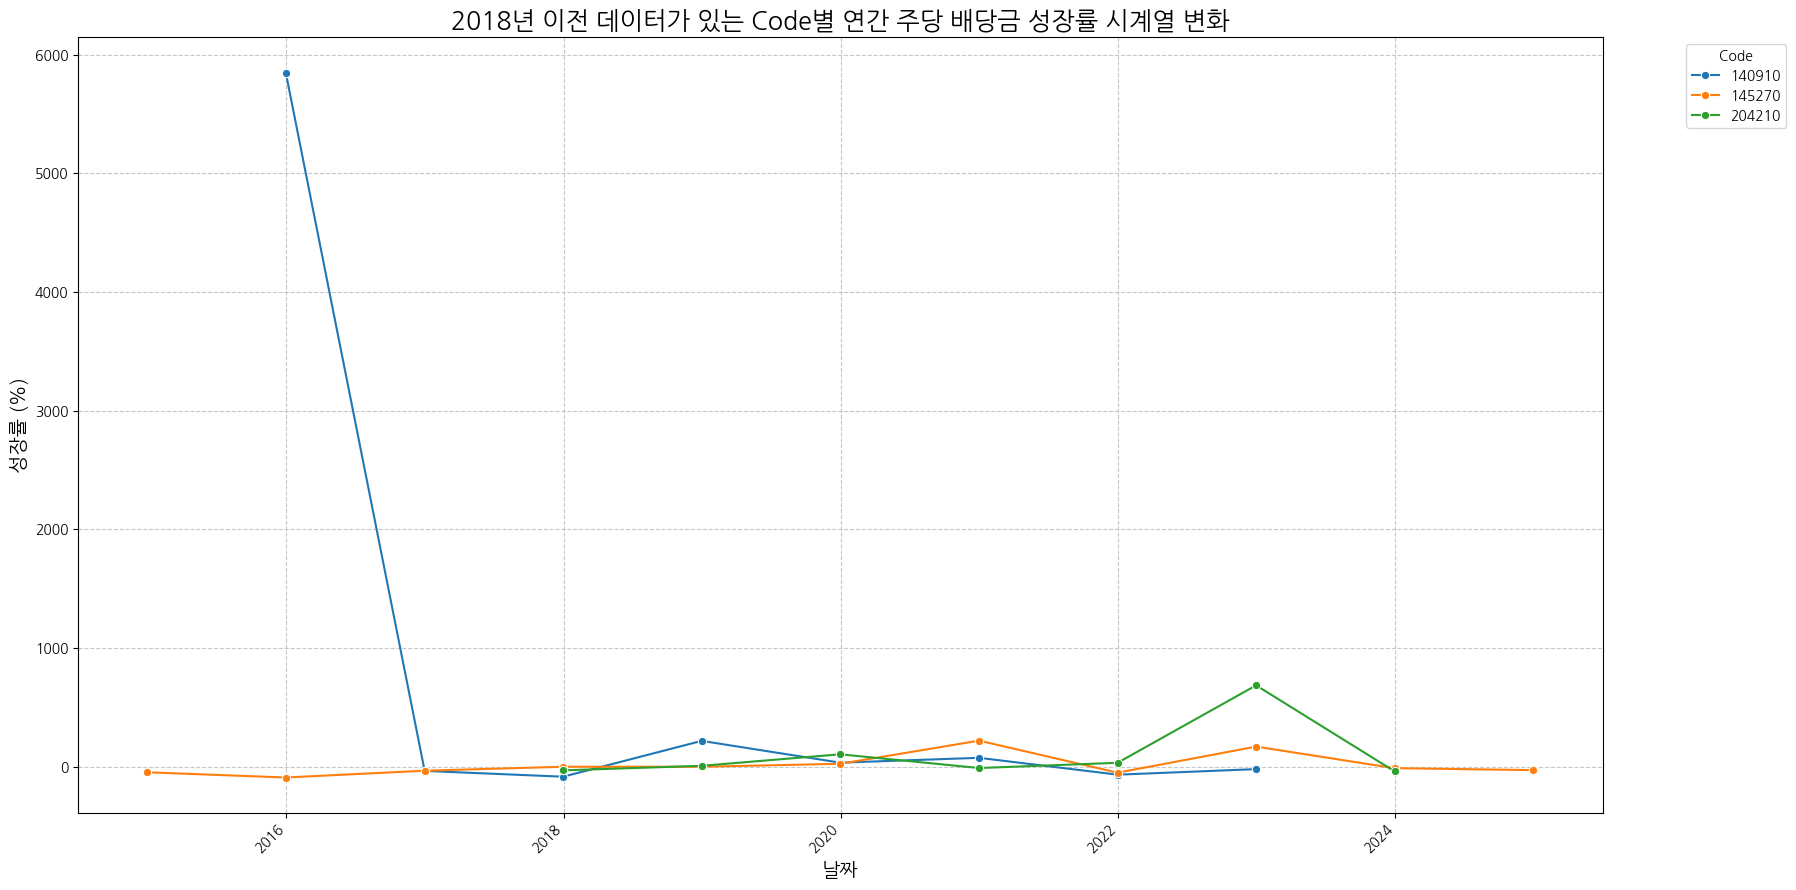

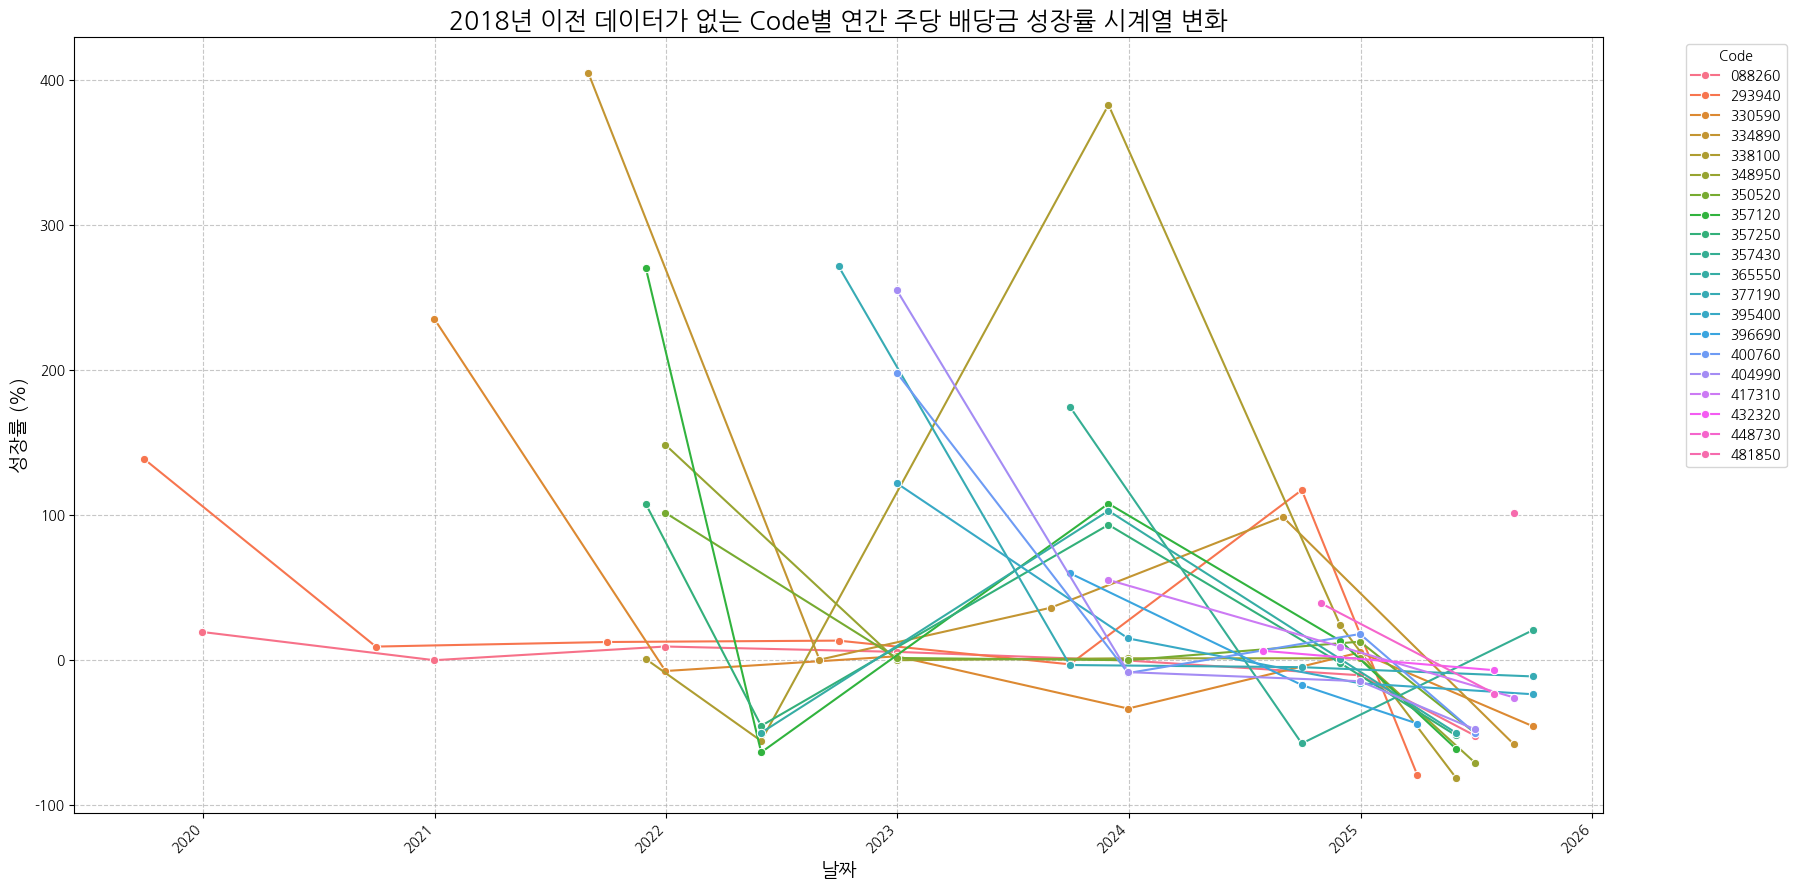

In [14]:
# 2018년 이전 성장률 데이터가 있는 'code'들을 찾습니다.
codes_pre_2017_growth = df_growth_rate[df_growth_rate['date'].dt.year < 2018]['code'].unique()

# 2018년 이전 성장률 데이터가 있는 'code'들의 전체 데이터
df_growth_has_pre_2017_data = df_growth_rate[df_growth_rate['code'].isin(codes_pre_2017_growth)].copy()

# 2018년 이전 성장률 데이터가 없는 'code'들의 전체 데이터
df_growth_no_pre_2017_data = df_growth_rate[~df_growth_rate['code'].isin(codes_pre_2017_growth)].copy()

# --- 첫 번째 차트: 2018년 이전 데이터가 있는 코드 그룹 (성장률) ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_ytd_growth_rate', hue='code', data=df_growth_has_pre_2017_data, marker='o')

plt.title('2018년 이전 데이터가 있는 Code별 연간 주당 배당금 성장률 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 두 번째 차트: 2018년 이전 데이터가 없는 코드 그룹 (성장률) ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='date', y='div_ytd_growth_rate', hue='code', data=df_growth_no_pre_2017_data, marker='o')

plt.title('2018년 이전 데이터가 없는 Code별 연간 주당 배당금 성장률 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 각 Code별 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 성장률 2018년 이전 데이터 유무에 따른 정규화 및 시계열 시각화

'df_growth_rate' 데이터를 사용하여 2018년 이전 성장률 기록이 있는 'code'들과 그렇지 않은 'code'들을 분리합니다. 이후 각 그룹의 성장률 데이터를 0과 1 사이로 Min-Max 정규화하고, 정규화된 값을 사용하여 시계열 그래프를 두 개의 차트로 시각화합니다.

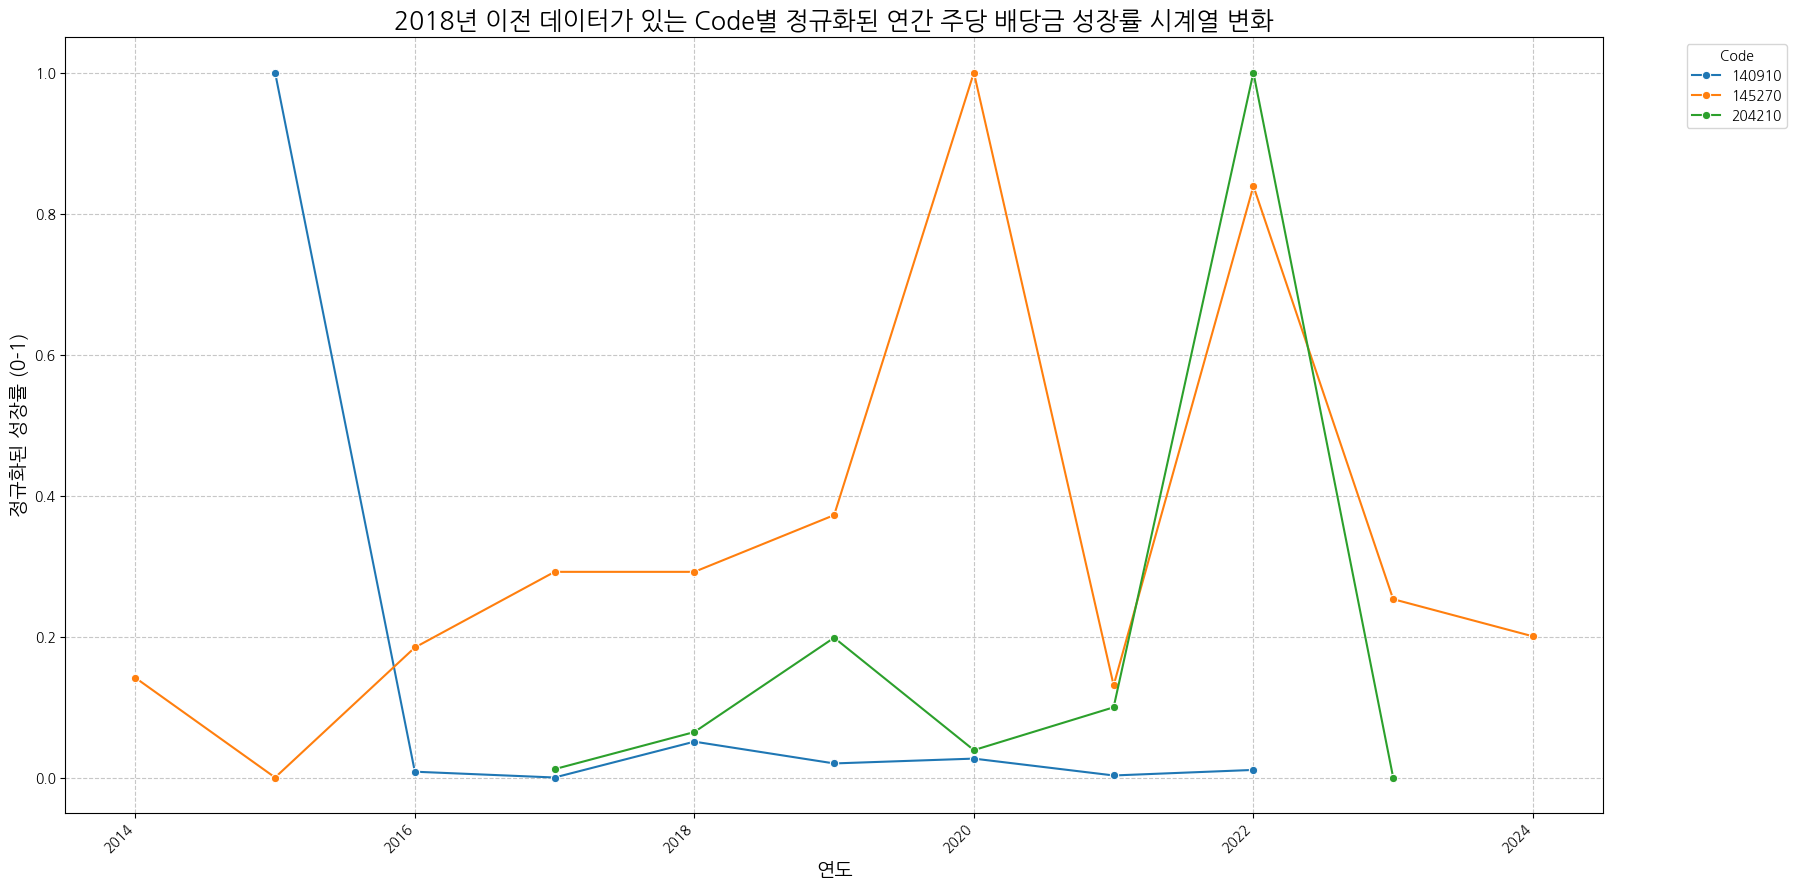

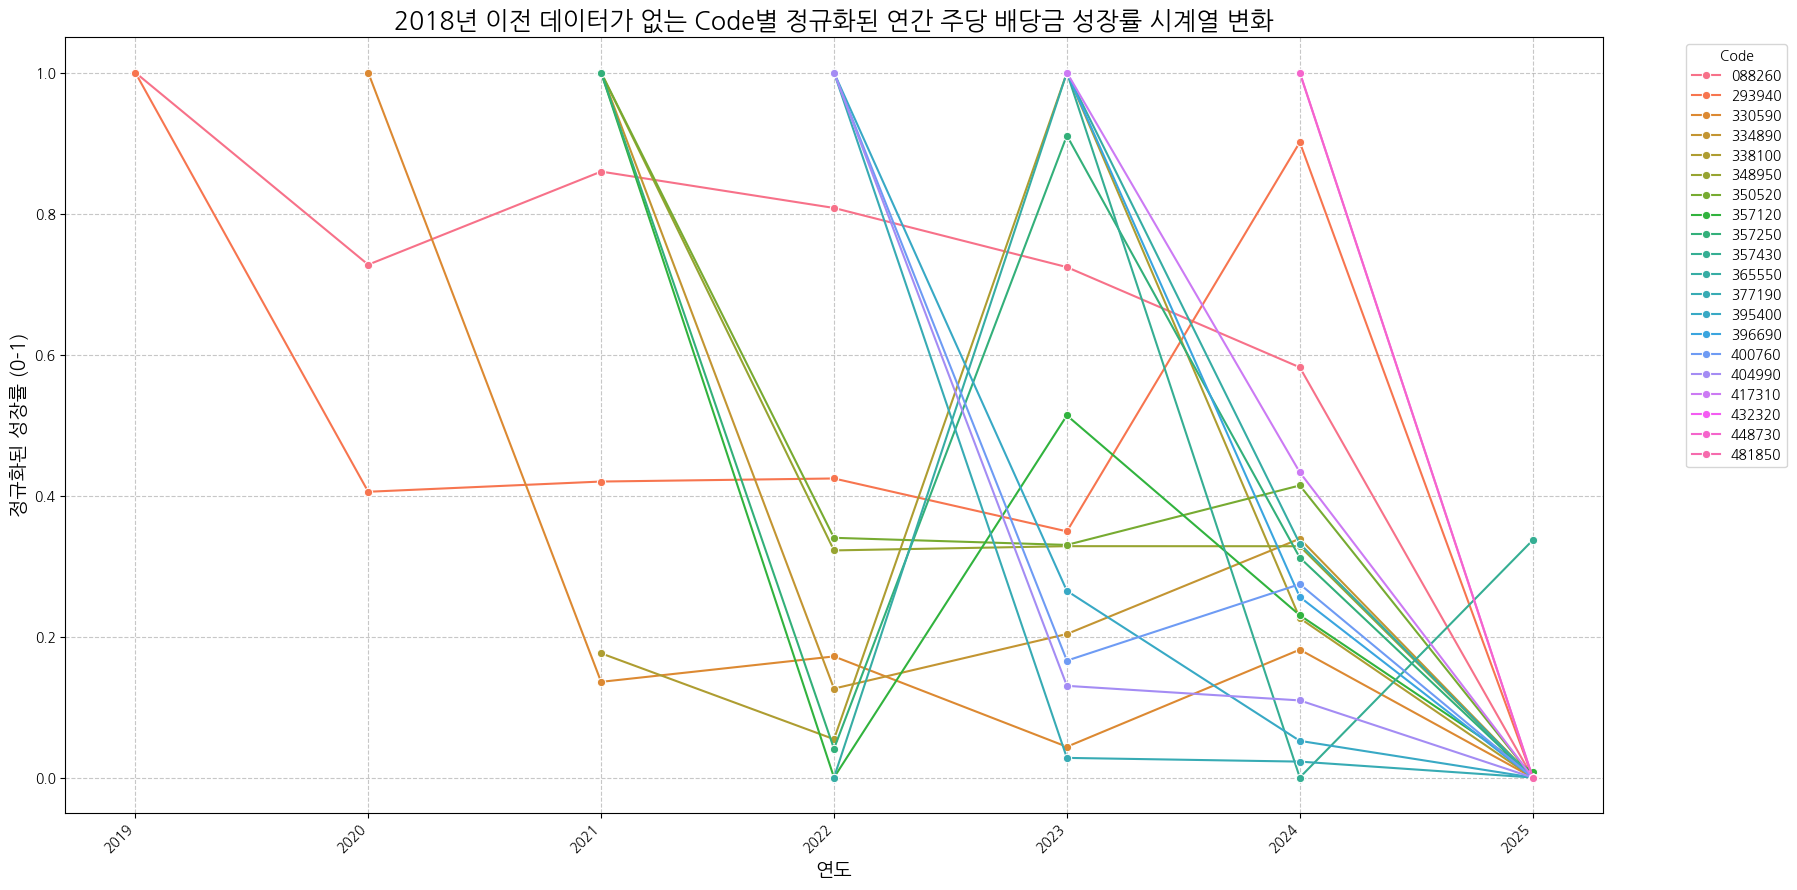

In [15]:
# 2018년 이전 성장률 데이터가 있는 'code'들을 찾습니다.
codes_pre_2018_growth = df_growth_rate[df_growth_rate['date'].dt.year < 2018]['code'].unique()

# 2018년 이전 성장률 데이터가 있는 'code'들의 전체 데이터
df_growth_has_pre_2018_data_norm = df_growth_rate[df_growth_rate['code'].isin(codes_pre_2018_growth)].copy()

# 2018년 이전 성장률 데이터가 없는 'code'들의 전체 데이터
df_growth_no_pre_2018_data_norm = df_growth_rate[~df_growth_rate['code'].isin(codes_pre_2018_growth)].copy()

# --- 각 그룹별로 성장률 정규화 ---
df_growth_has_pre_2018_data_norm['normalized_div_ytd_growth_rate'] = df_growth_has_pre_2018_data_norm.groupby('code')['div_ytd_growth_rate'].transform(min_max_normalize)
df_growth_no_pre_2018_data_norm['normalized_div_ytd_growth_rate'] = df_growth_no_pre_2018_data_norm.groupby('code')['div_ytd_growth_rate'].transform(min_max_normalize)

# --- 첫 번째 차트: 2018년 이전 데이터가 있는 코드 그룹 (정규화된 성장률) ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x=df_growth_has_pre_2018_data_norm['date'].dt.year, y='normalized_div_ytd_growth_rate', hue='code', data=df_growth_has_pre_2018_data_norm, marker='o')

plt.title('2018년 이전 데이터가 있는 Code별 정규화된 연간 주당 배당금 성장률 시계열 변화', fontsize=18)
plt.xlabel('연도', fontsize=14)
plt.ylabel('정규화된 성장률 (0-1)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 두 번째 차트: 2018년 이전 데이터가 없는 코드 그룹 (정규화된 성장률) ---
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x=df_growth_no_pre_2018_data_norm['date'].dt.year, y='normalized_div_ytd_growth_rate', hue='code', data=df_growth_no_pre_2018_data_norm, marker='o')

plt.title('2018년 이전 데이터가 없는 Code별 정규화된 연간 주당 배당금 성장률 시계열 변화', fontsize=18)
plt.xlabel('연도', fontsize=14)
plt.ylabel('정규화된 성장률 (0-1)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 연도별 최대 연간 주당 배당금(div_per_stock_ytd) 박스 플롯 시각화

'df_annual_max_div_ytd' 데이터를 사용하여 연도별 'div_per_stock_ytd'의 분포를 박스 플롯으로 시각화합니다. 이를 통해 각 연도별 배당금 수준의 중앙값, 사분위수 및 이상치를 확인할 수 있습니다.

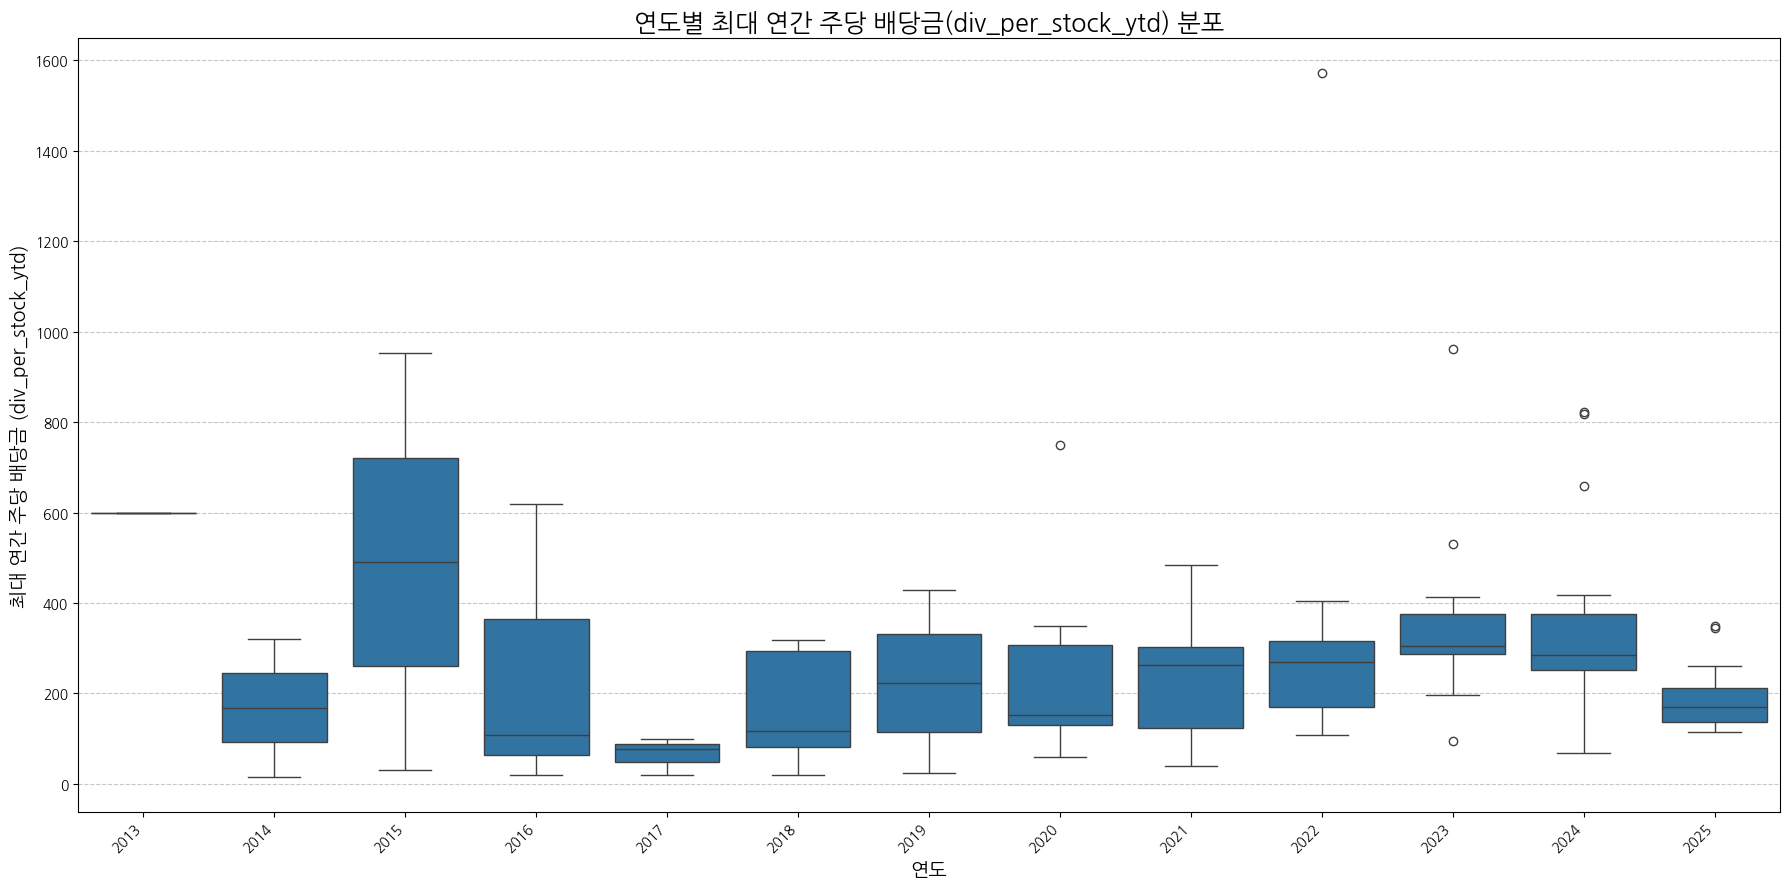

In [16]:
# 연도를 x축으로 사용하기 위해 'date' 컬럼에서 연도 정보를 추출합니다.
df_annual_max_div_ytd['year'] = df_annual_max_div_ytd['date'].dt.year

# 시각화: 연도별 'div_per_stock_ytd' 분포를 박스 플롯으로 그립니다.
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.boxplot(x='year', y='div_per_stock_ytd', data=df_annual_max_div_ytd)

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('연도별 최대 연간 주당 배당금(div_per_stock_ytd) 분포', fontsize=18)
plt.xlabel('연도', fontsize=14)
plt.ylabel('최대 연간 주당 배당금 (div_per_stock_ytd)', fontsize=14)

# x축 라벨이 많을 경우 겹치지 않도록 회전합니다.
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

## 상장 후 경과기간별 변화

### 각 Code별 상장 후 경과연도 기준 연간 주당 배당금 성장률 시각화

'date' 열에서 연도를 추출하고, 각 'code'의 최초 상장 연도를 기준으로 '상장 후 n년차'를 계산합니다. 이후 '상장 후 n년차'를 x축으로 사용하여 연간 주당 배당금 성장률의 시계열 변화를 시각화합니다.

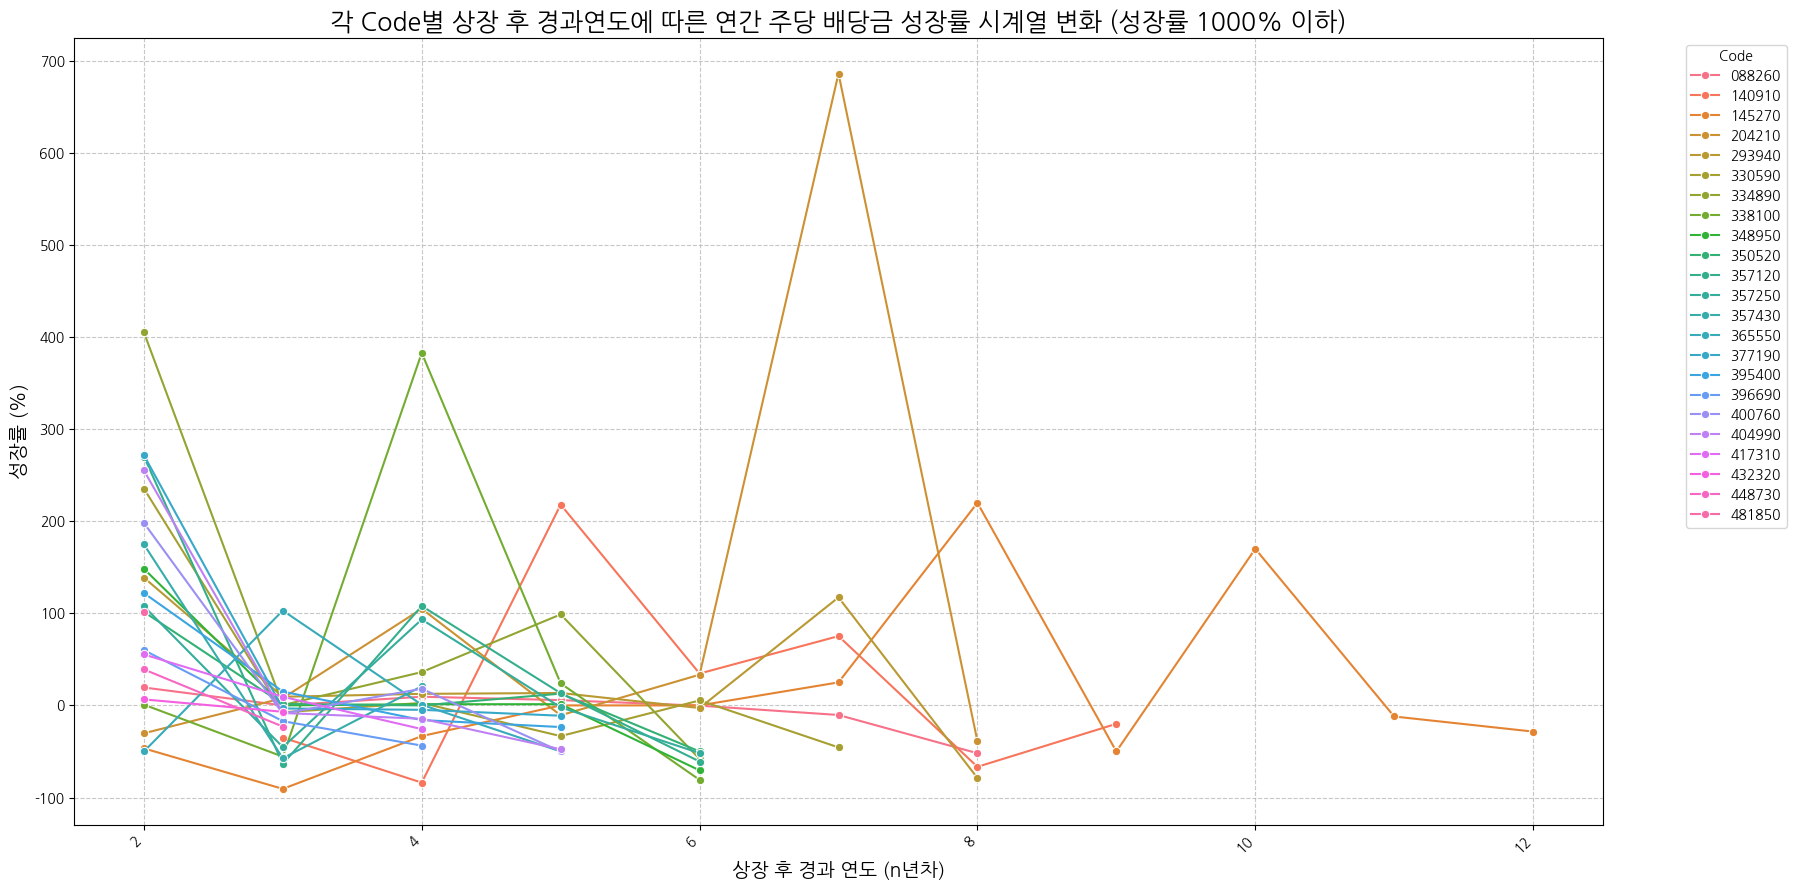

In [17]:
# 각 'code'의 최초 상장 연도(가장 오래된 데이터의 연도)를 계산합니다.
listing_years = df_sorted.groupby('code')['date'].min().dt.year.rename('listing_year').reset_index()

# df_growth_rate와 listing_years를 'code' 기준으로 병합합니다.
df_growth_with_listing_year = pd.merge(df_growth_rate, listing_years, on='code', how='left')

# '상장 후 n년차' (Age) 컬럼을 계산합니다.
# 현재 연도 - 상장 연도 + 1 (상장 연도가 1년차)
df_growth_with_listing_year['years_since_listing'] = df_growth_with_listing_year['date'].dt.year - df_growth_with_listing_year['listing_year'] + 1

# 성장률이 1000%를 초과하는 데이터 제거
df_growth_with_listing_year_filtered = df_growth_with_listing_year[df_growth_with_listing_year['div_ytd_growth_rate'] <= 1000].copy()

# 시각화: 각 'code'별 '상장 후 n년차'에 따른 성장률 시계열 그래프를 그립니다.
plt.figure(figsize=(18, 9)) # 플롯 크기 설정
sns.lineplot(x='years_since_listing', y='div_ytd_growth_rate', hue='code', data=df_growth_with_listing_year_filtered, marker='o')

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('각 Code별 상장 후 경과연도에 따른 연간 주당 배당금 성장률 시계열 변화 (성장률 1000% 이하)', fontsize=18)
plt.xlabel('상장 후 경과 연도 (n년차)', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)

# x축 라벨이 많을 경우 겹치지 않도록 회전합니다.
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

In [18]:
df_annual_max_div_ytd['year'] = df_annual_max_div_ytd['date'].dt.year

# 히트맵을 위한 데이터 준비: 'code'를 인덱스로, 'year'를 컬럼으로, 'div_per_stock_ytd'를 값으로 사용합니다.
# 여러 해에 걸쳐 같은 'code'와 'year' 조합이 있을 경우, 평균값을 사용하도록 설정합니다.
pivot_table = df_annual_max_div_ytd.pivot_table(index='code', columns='year', values='div_per_stock_ytd', aggfunc='mean')

# NaN 값은 0으로 채워 시각화 시 빈 공간으로 표시되지 않도록 합니다.
pivot_table = pivot_table.fillna(0)

display(pivot_table.head())

year     2013   2014   2015   2016   2017   2018   2019   2020   2021    2022  \
code                                                                            
0030R0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
088260    0.0    0.0    0.0    0.0    0.0  293.0  350.0  350.0  383.0   405.0   
140910    0.0   16.0  952.0  619.0  100.0  318.0  428.0  750.0  250.0   200.0   
145270  600.0  320.0   30.0   20.0   20.0   20.0   25.0   80.0   40.0   108.0   
204210    0.0    0.0    0.0  109.0   76.0   82.0  168.0  150.0  200.0  1572.0   

year     2023   2024   2025  
code                         
0030R0    0.0    0.0  171.0  
088260  404.0  362.0  174.0  
140910    0.0    0.0    0.0  
145270   95.0   68.0    0.0  
204210  961.0    0.0    0.0

## 기타 시각화


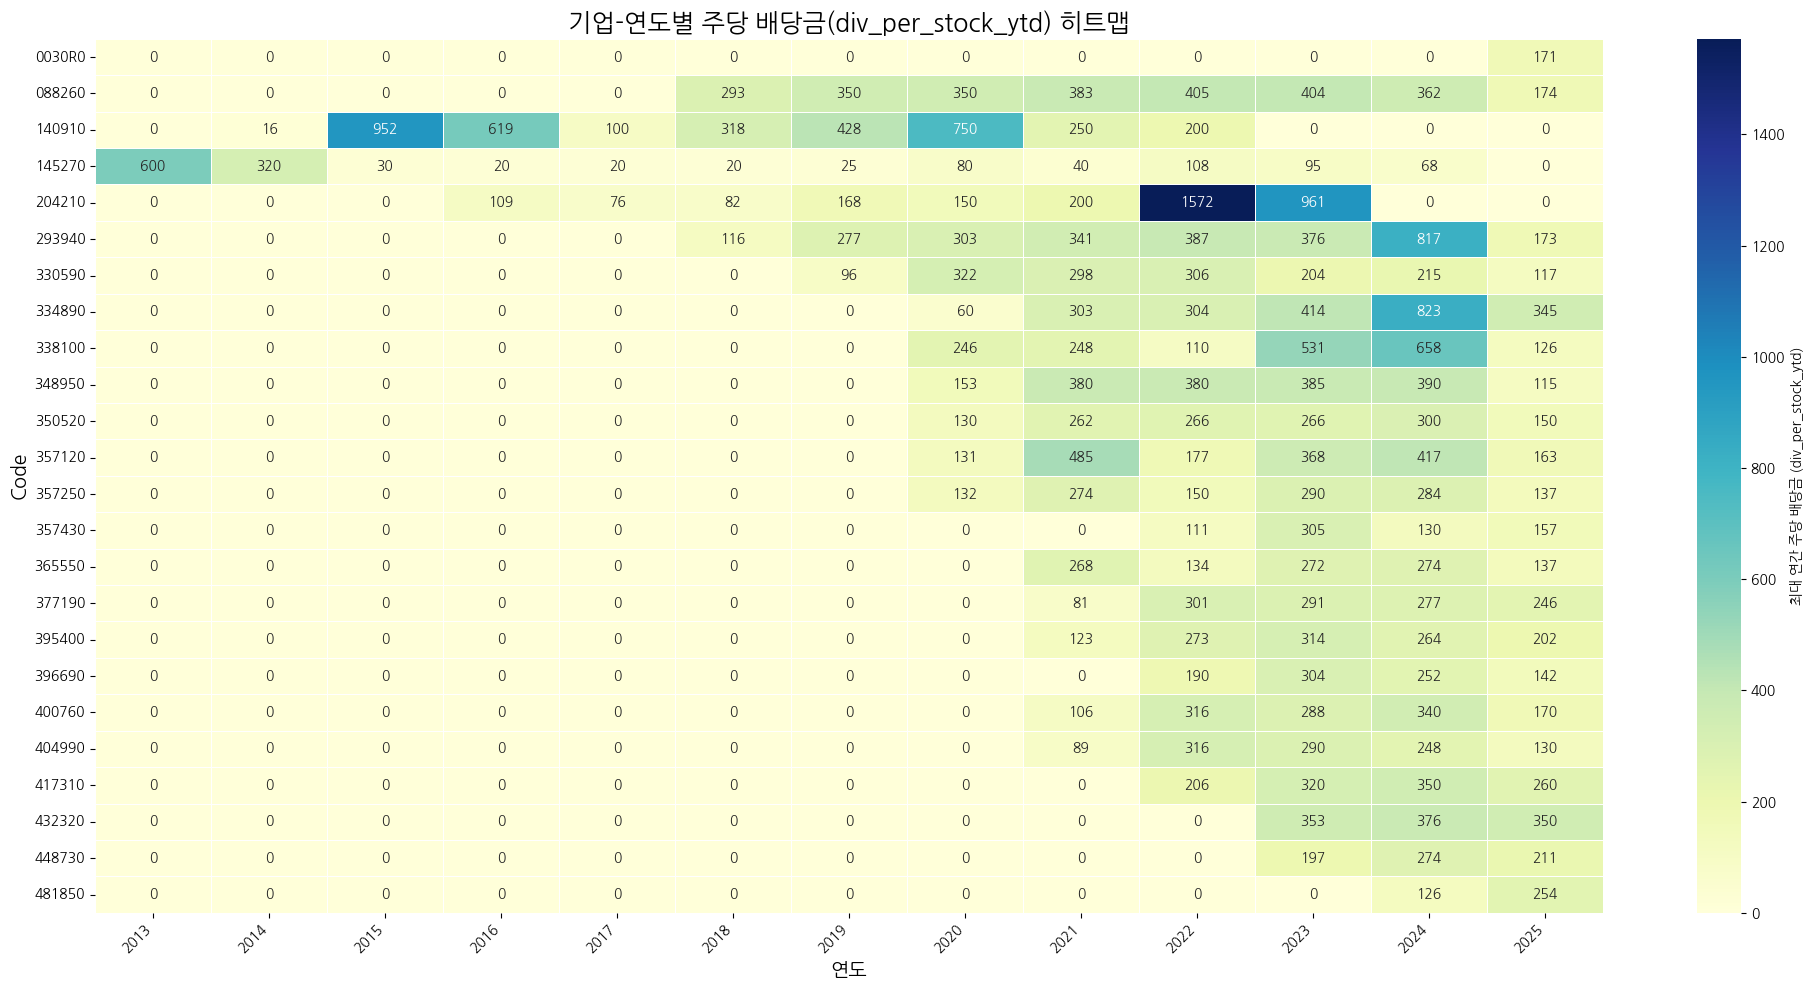

In [19]:
# 시각화: 히트맵
plt.figure(figsize=(20, 10)) # 플롯 크기 설정
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': '최대 연간 주당 배당금 (div_per_stock_ytd)'})

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('기업-연도별 주당 배당금(div_per_stock_ytd) 히트맵', fontsize=18)
plt.xlabel('연도', fontsize=14)
plt.ylabel('Code', fontsize=14)

plt.xticks(rotation=45, ha='right') # x축 라벨 회전
plt.yticks(rotation=0) # y축 라벨 회전 방지
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

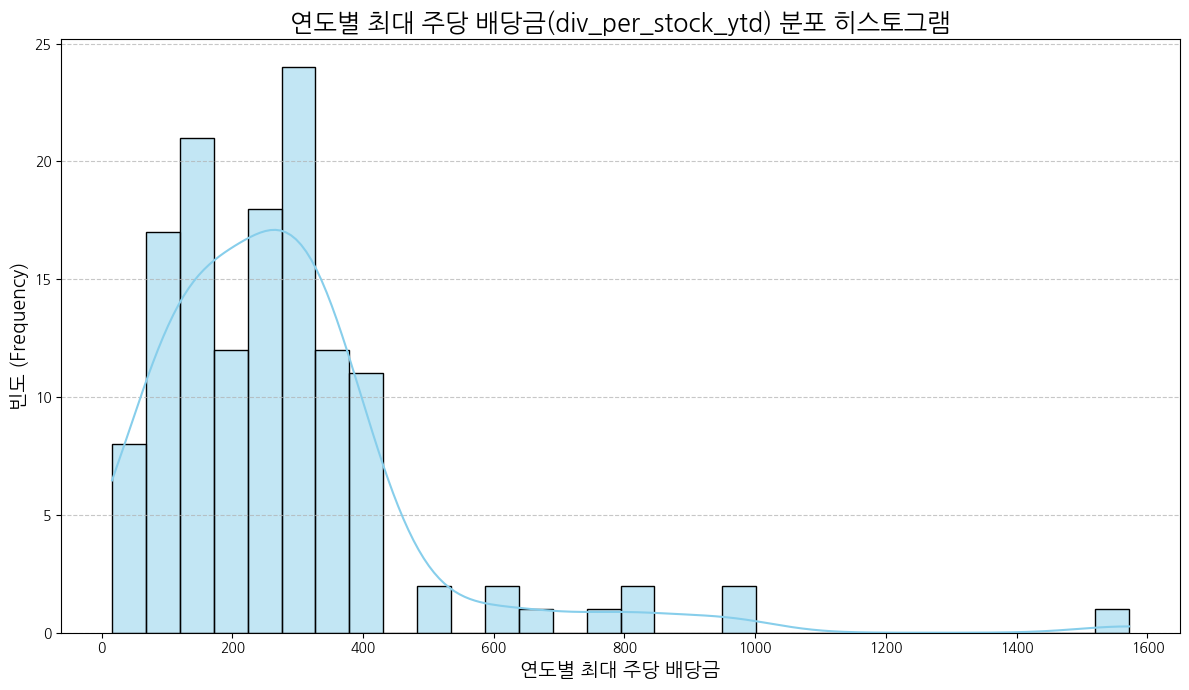

In [20]:
# 시각화: 'div_per_stock_ytd'의 분포를 히스토그램으로 그립니다.
plt.figure(figsize=(12, 7)) # 플롯 크기 설정
sns.histplot(df_annual_max_div_ytd['div_per_stock_ytd'].dropna(), bins=30, kde=True, color='skyblue')

# 플롯 제목 및 축 라벨 설정 (한글)
plt.title('연도별 최대 주당 배당금(div_per_stock_ytd) 분포 히스토그램', fontsize=18)
plt.xlabel('연도별 최대 주당 배당금', fontsize=14)
plt.ylabel('빈도 (Frequency)', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

### 평균 배당금과 배당금 표준편차 산점도

In [36]:
grouped_metrics = df_annual_max_div_ytd.groupby('code')['div_per_stock_ytd'].agg(['mean', 'std']).reset_index()
grouped_metrics = grouped_metrics.rename(columns={'mean': 'mean_div_per_stock_ytd', 'std': 'std_div_per_stock_ytd'})

# Calculate Coefficient of Variation (CV)
# Handle cases where mean is zero to avoid division by zero errors
grouped_metrics['cv_div_per_stock_ytd'] = np.where(
    grouped_metrics['mean_div_per_stock_ytd'] == 0,
    0, # Set CV to 0 if mean is 0
    grouped_metrics['std_div_per_stock_ytd'] / grouped_metrics['mean_div_per_stock_ytd']
)

display(grouped_metrics.head())

code  mean_div_per_stock_ytd  std_div_per_stock_ytd  cv_div_per_stock_ytd
0  0030R0              171.000000                    NaN                   NaN
1  088260              340.125000              76.175432              0.223963
2  140910              403.666667             312.751499              0.774777
3  145270              118.833333             172.937631              1.455296
4  204210              414.750000             552.095941              1.331154

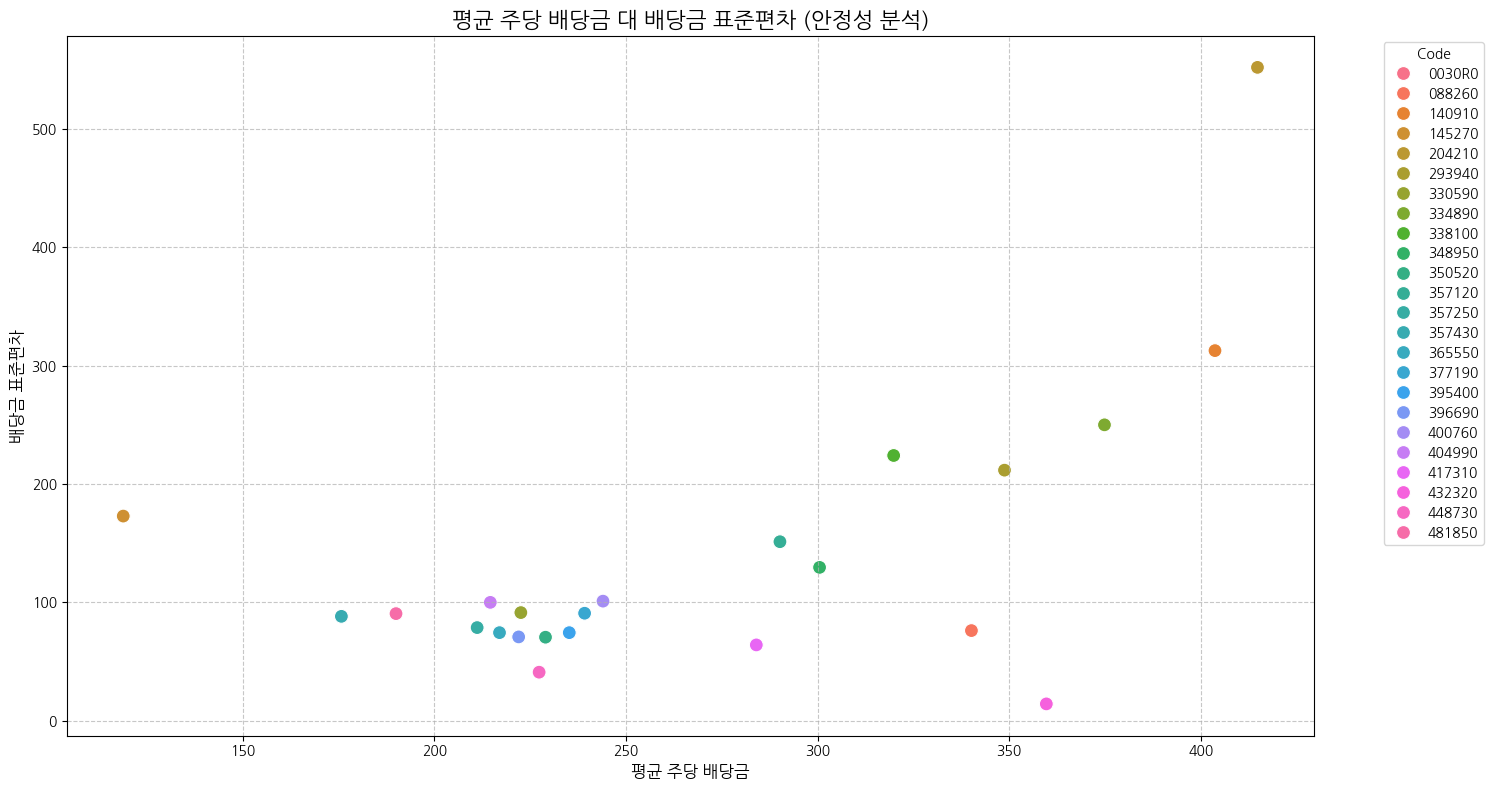

In [37]:
plt.figure(figsize=(15, 8)) # 플롯 크기 설정
sns.scatterplot(x='mean_div_per_stock_ytd', y='std_div_per_stock_ytd', hue='code', data=grouped_metrics, s=100) # 산점도 생성

# 플롯 제목 및 축 라벨 설정
plt.title('평균 주당 배당금 대 배당금 표준편차 (안정성 분석)', fontsize=16)
plt.xlabel('평균 주당 배당금', fontsize=12)
plt.ylabel('배당금 표준편차', fontsize=12)

plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시

In [38]:
df_annual_max_div_ytd_sorted = df_annual_max_div_ytd.sort_values(by=['code', 'year']).copy()

# Calculate the year-over-year change for div_per_stock_ytd
df_annual_max_div_ytd_sorted['prev_div_per_stock_ytd'] = df_annual_max_div_ytd_sorted.groupby('code')['div_per_stock_ytd'].shift(1)

# Identify years where dividend increased
df_annual_max_div_ytd_sorted['dividend_increased'] = df_annual_max_div_ytd_sorted['div_per_stock_ytd'] > df_annual_max_div_ytd_sorted['prev_div_per_stock_ytd']

display(df_annual_max_div_ytd_sorted.head())

code       date  year  month  day          div_total  div_per_stock  \
0    0030R0 2025-08-31  2025      8   31   4,371,412,500.00           73.0   
227  088260 2018-12-31  2018     12   31  11,084,778,250.00          175.0   
225  088260 2019-12-31  2019     12   31  11,084,778,250.00          175.0   
223  088260 2020-12-31  2020     12   31  11,084,778,250.00          175.0   
221  088260 2021-12-31  2021     12   31  12,978,792,455.00          204.0   

     div_per_stock_ytd div_yield  normalized_div_per_stock  \
0                171.0      0.15                  0.000000   
227              293.0      0.35                  0.619565   
225              350.0      0.35                  0.619565   
223              350.0      0.35                  0.619565   
221              383.0      0.41                  0.934783   

     normalized_div_per_stock_ytd  div_ytd_growth_rate  \
0                        1.000000                  NaN   
227                      0.609756                  NaN   
225                      0.808362            19.453925   
223                      0.808362             0.000000   
221                      0.923345             9.428571   

     prev_div_per_stock_ytd  dividend_increased  
0                       NaN               False  
227                     NaN               False  
225                   293.0                True  
223                   350.0               False  
221                   350.0                True

In [39]:
def calculate_consecutive_growth(series):
    max_growth_years = 0
    current_growth_years = 0
    for increased in series:
        if increased:
            current_growth_years += 1
        else:
            max_growth_years = max(max_growth_years, current_growth_years)
            current_growth_years = 0
    max_growth_years = max(max_growth_years, current_growth_years)
    return max_growth_years

# Apply the function to each code group
dividend_growth_periods = df_annual_max_div_ytd_sorted.groupby('code')['dividend_increased'].apply(calculate_consecutive_growth).reset_index()
dividend_growth_periods = dividend_growth_periods.rename(columns={'dividend_increased': 'consecutive_growth_years'})

# Sort and display the top 10 companies with the longest continuous dividend growth periods
top_10_growth_companies = dividend_growth_periods.sort_values(by='consecutive_growth_years', ascending=False).head(10)

print("Top 10 Companies with Longest Continuous Dividend Growth Periods:")
display(top_10_growth_companies)

Top 10 Companies with Longest Continuous Dividend Growth Periods:


code  consecutive_growth_years
7   334890                         4
5   293940                         4
2   140910                         3
1   088260                         2
4   204210                         2
3   145270                         2
9   348950                         2
8   338100                         2
14  365550                         2
16  395400                         2

## YoY 성장률

In [22]:
df_sorted['year'] = df_sorted['date'].dt.year
df_sorted['month'] = df_sorted['date'].dt.month

df_prev_year = df_sorted.copy()
df_prev_year['year'] = df_prev_year['year'] - 1
df_prev_year = df_prev_year.rename(columns={'div_per_stock': 'div_per_stock_prev_year'})

df_merged = pd.merge(
    df_sorted,
    df_prev_year[['code', 'year', 'month', 'div_per_stock_prev_year']],
    on=['code', 'year', 'month'],
    how='left'
)

display(df_merged.head())

code       date  year  month  day          div_total  div_per_stock  \
0  0030R0 2025-05-31  2025      5   31   2,914,275,000.00           98.0   
1  0030R0 2025-08-31  2025      8   31   4,371,412,500.00           73.0   
2  088260 2018-06-30  2018      6   30   7,447,052,064.00          118.0   
3  088260 2018-12-31  2018     12   31  11,084,778,250.00          175.0   
4  088260 2019-06-30  2019      6   30  11,084,778,250.00          175.0   

   div_per_stock_ytd div_yield  normalized_div_per_stock  \
0               98.0       0.2                  1.000000   
1              171.0      0.15                  0.000000   
2              118.0      0.24                  0.000000   
3              293.0      0.35                  0.619565   
4              175.0      0.35                  0.619565   

   normalized_div_per_stock_ytd  div_per_stock_prev_year  
0                      0.000000                      NaN  
1                      1.000000                      NaN  
2                      0.000000                    175.0  
3                      0.609756                    175.0  
4                      0.198606                    175.0

In [24]:
df_merged['div_growth_rate'] = ((df_merged['div_per_stock'] - df_merged['div_per_stock_prev_year']) / df_merged['div_per_stock_prev_year']) * 100

display(df_merged.head())

code       date  year  month  day          div_total  div_per_stock  \
0  0030R0 2025-05-31  2025      5   31   2,914,275,000.00           98.0   
1  0030R0 2025-08-31  2025      8   31   4,371,412,500.00           73.0   
2  088260 2018-06-30  2018      6   30   7,447,052,064.00          118.0   
3  088260 2018-12-31  2018     12   31  11,084,778,250.00          175.0   
4  088260 2019-06-30  2019      6   30  11,084,778,250.00          175.0   

   div_per_stock_ytd div_yield  normalized_div_per_stock  \
0               98.0       0.2                  1.000000   
1              171.0      0.15                  0.000000   
2              118.0      0.24                  0.000000   
3              293.0      0.35                  0.619565   
4              175.0      0.35                  0.619565   

   normalized_div_per_stock_ytd  div_per_stock_prev_year  div_growth_rate  
0                      0.000000                      NaN              NaN  
1                      1.000000                      NaN              NaN  
2                      0.000000                    175.0       -32.571429  
3                      0.609756                    175.0         0.000000  
4                      0.198606                    175.0         0.000000

### YoY 성장률 변화

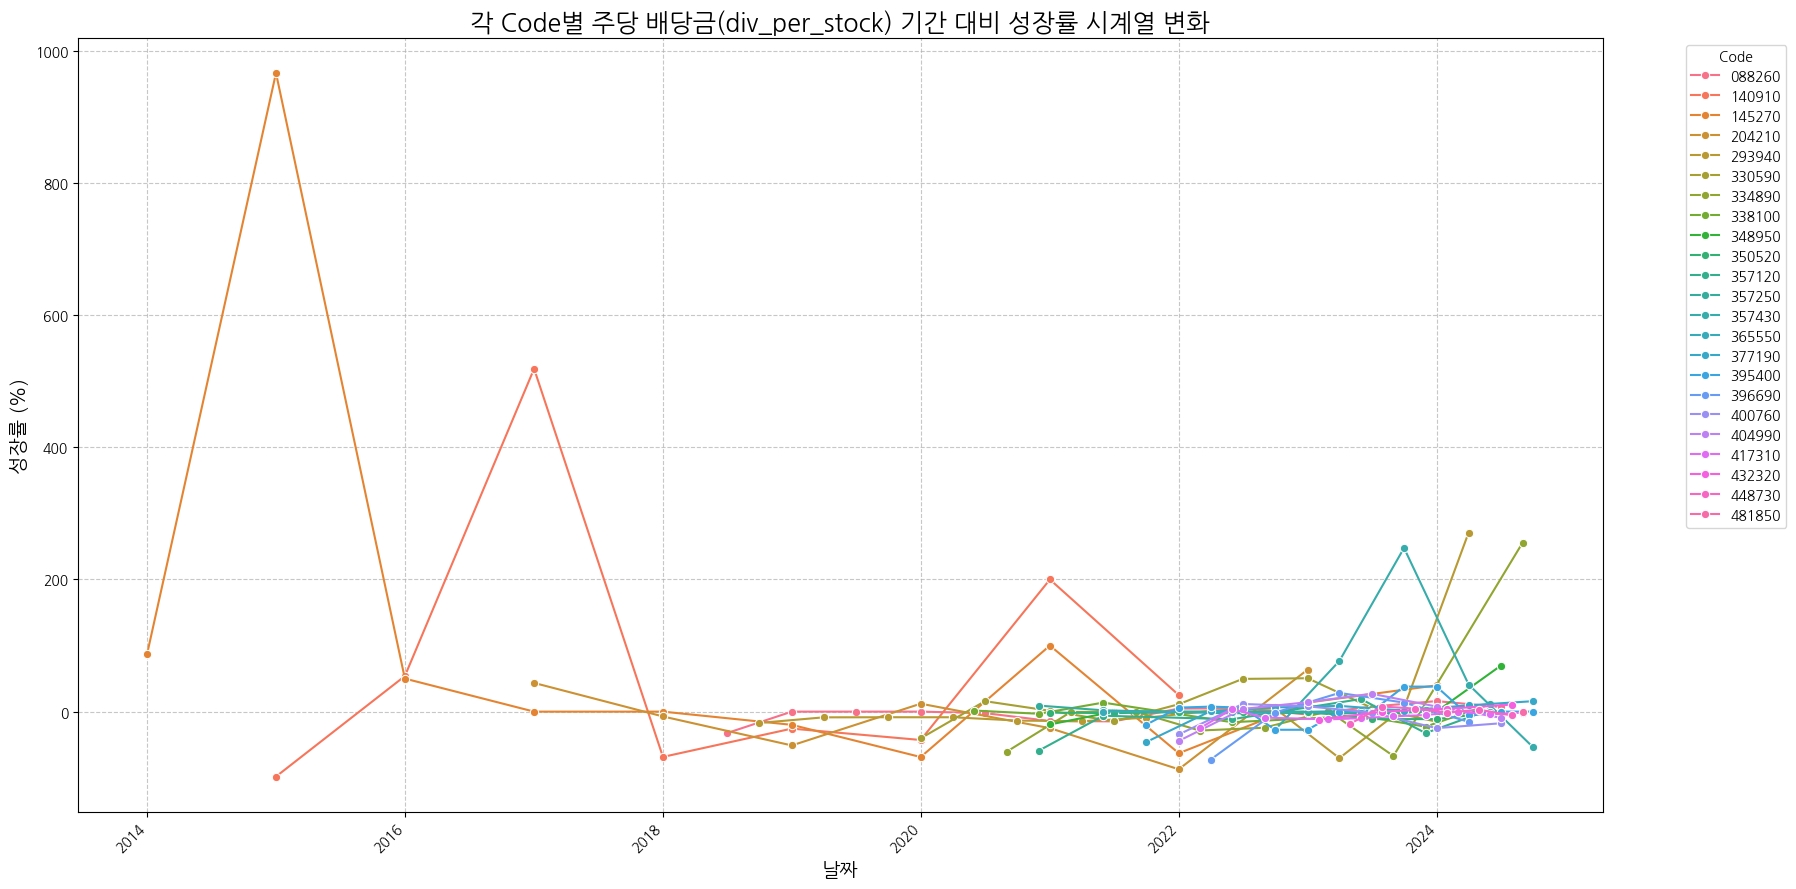

In [26]:
plt.figure(figsize=(18, 9))
sns.lineplot(x='date', y='div_growth_rate', hue='code', data=df_merged.dropna(subset=['div_growth_rate']), marker='o')

plt.title('각 Code별 주당 배당금(div_per_stock) 기간 대비 성장률 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
codes_pre_2017_yoy_growth = df_merged[df_merged['date'].dt.year < 2017]['code'].unique()
print(f"Codes with pre-2017 data for YoY growth: {codes_pre_2017_yoy_growth}")

Codes with pre-2017 data for YoY growth: ['140910' '145270' '204210']


In [30]:
df_growth_has_pre_2017_data_yoy = df_merged[df_merged['code'].isin(codes_pre_2017_yoy_growth)].copy()
df_growth_no_pre_2017_data_yoy = df_merged[~df_merged['code'].isin(codes_pre_2017_yoy_growth)].copy()

df_growth_has_pre_2017_data_yoy = df_growth_has_pre_2017_data_yoy.dropna(subset=['div_growth_rate'])
df_growth_no_pre_2017_data_yoy = df_growth_no_pre_2017_data_yoy.dropna(subset=['div_growth_rate'])

print("df_growth_has_pre_2017_data_yoy created with shape:", df_growth_has_pre_2017_data_yoy.shape)
print("df_growth_no_pre_2017_data_yoy created with shape:", df_growth_no_pre_2017_data_yoy.shape)

df_growth_has_pre_2017_data_yoy created with shape: (26, 13)
df_growth_no_pre_2017_data_yoy created with shape: (145, 13)


### 2017년 이전 데이터 존재 여부로 분리

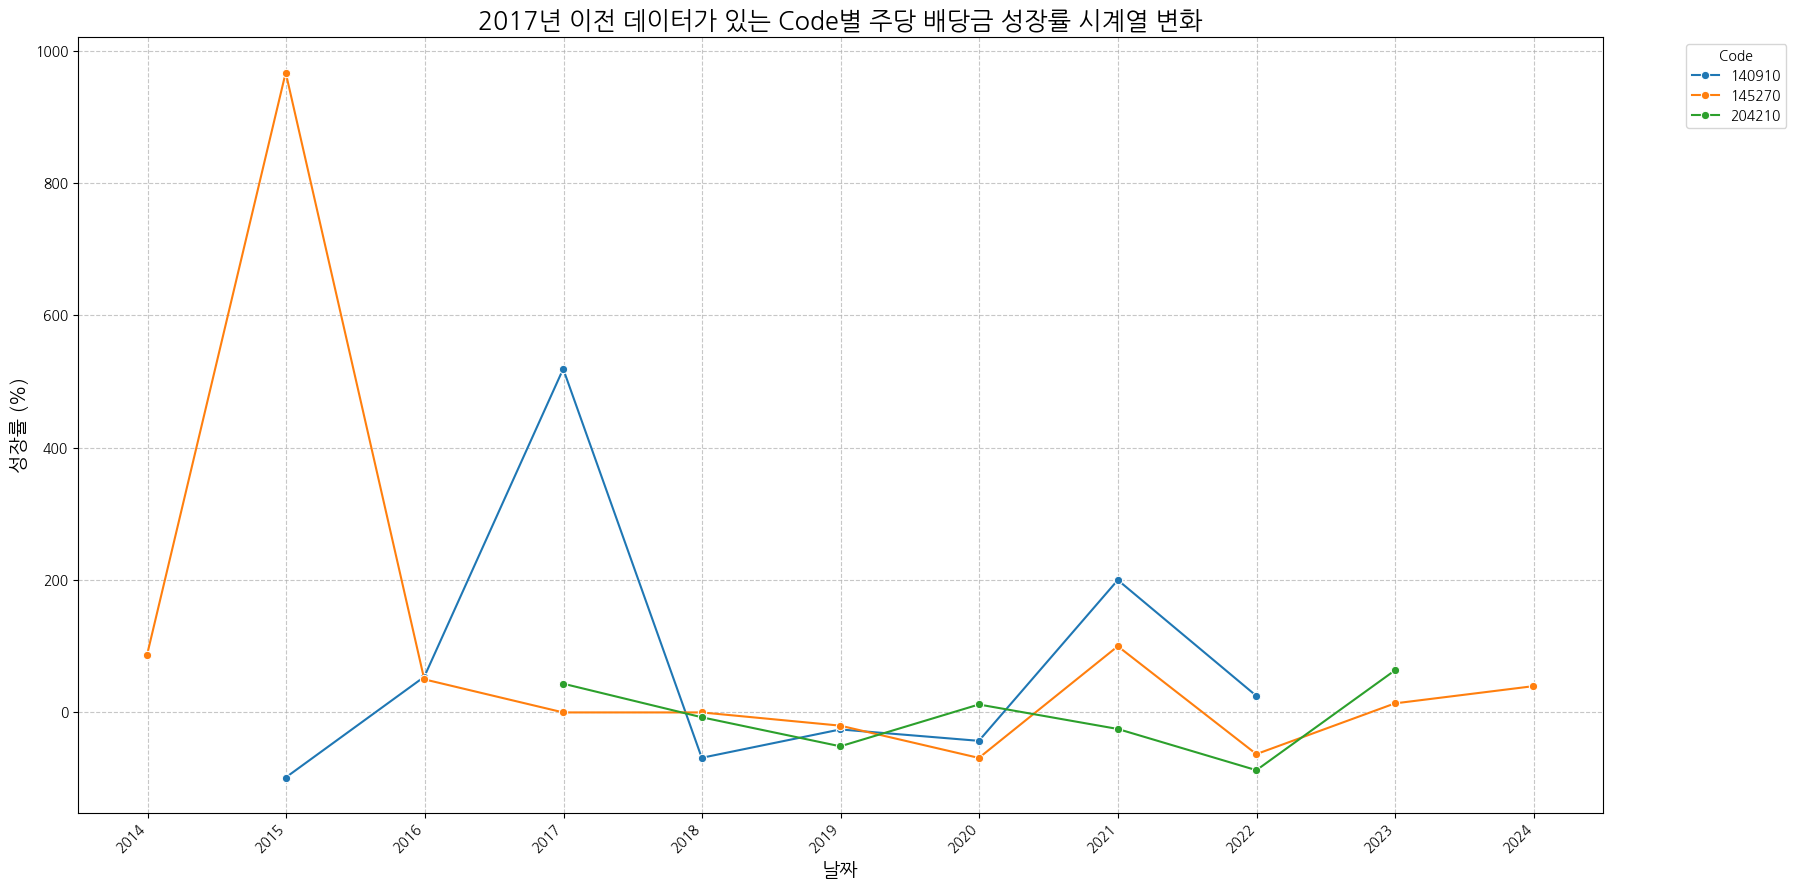

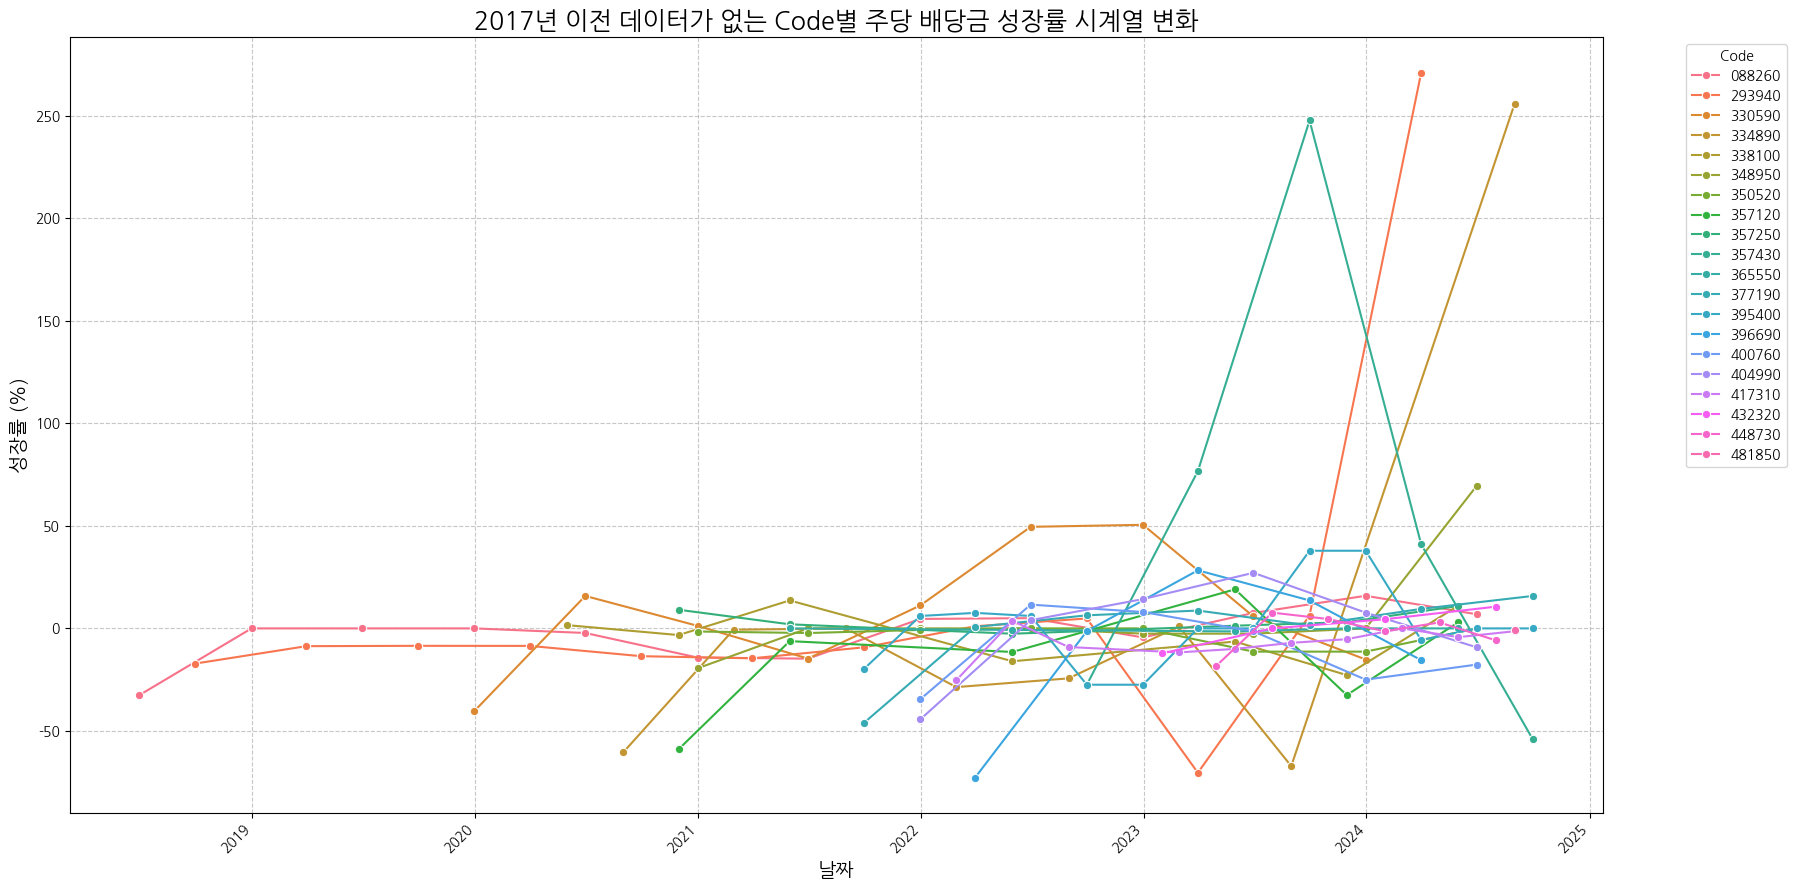

In [31]:
plt.figure(figsize=(18, 9))
sns.lineplot(x='date', y='div_growth_rate', hue='code', data=df_growth_has_pre_2017_data_yoy, marker='o')

plt.title('2017년 이전 데이터가 있는 Code별 주당 배당금 성장률 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 9))
sns.lineplot(x='date', y='div_growth_rate', hue='code', data=df_growth_no_pre_2017_data_yoy, marker='o')

plt.title('2017년 이전 데이터가 없는 Code별 주당 배당금 성장률 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 성장률 100% 초과 달성 여부로 분리

In [32]:
codes_over_100_percent_growth = df_merged[df_merged['div_growth_rate'] > 100]['code'].unique()

print(f"Codes with over 100% YoY growth: {codes_over_100_percent_growth}")

Codes with over 100% YoY growth: ['140910' '145270' '293940' '334890' '357430']


In [33]:
df_growth_over_100_percent = df_merged[df_merged['code'].isin(codes_over_100_percent_growth)].copy()
df_growth_not_over_100_percent = df_merged[~df_merged['code'].isin(codes_over_100_percent_growth)].copy()

df_growth_over_100_percent = df_growth_over_100_percent.dropna(subset=['div_growth_rate'])
df_growth_not_over_100_percent = df_growth_not_over_100_percent.dropna(subset=['div_growth_rate'])

print(f"Shape of df_growth_over_100_percent: {df_growth_over_100_percent.shape}")
print(f"Shape of df_growth_not_over_100_percent: {df_growth_not_over_100_percent.shape}")

Shape of df_growth_over_100_percent: (44, 13)
Shape of df_growth_not_over_100_percent: (127, 13)


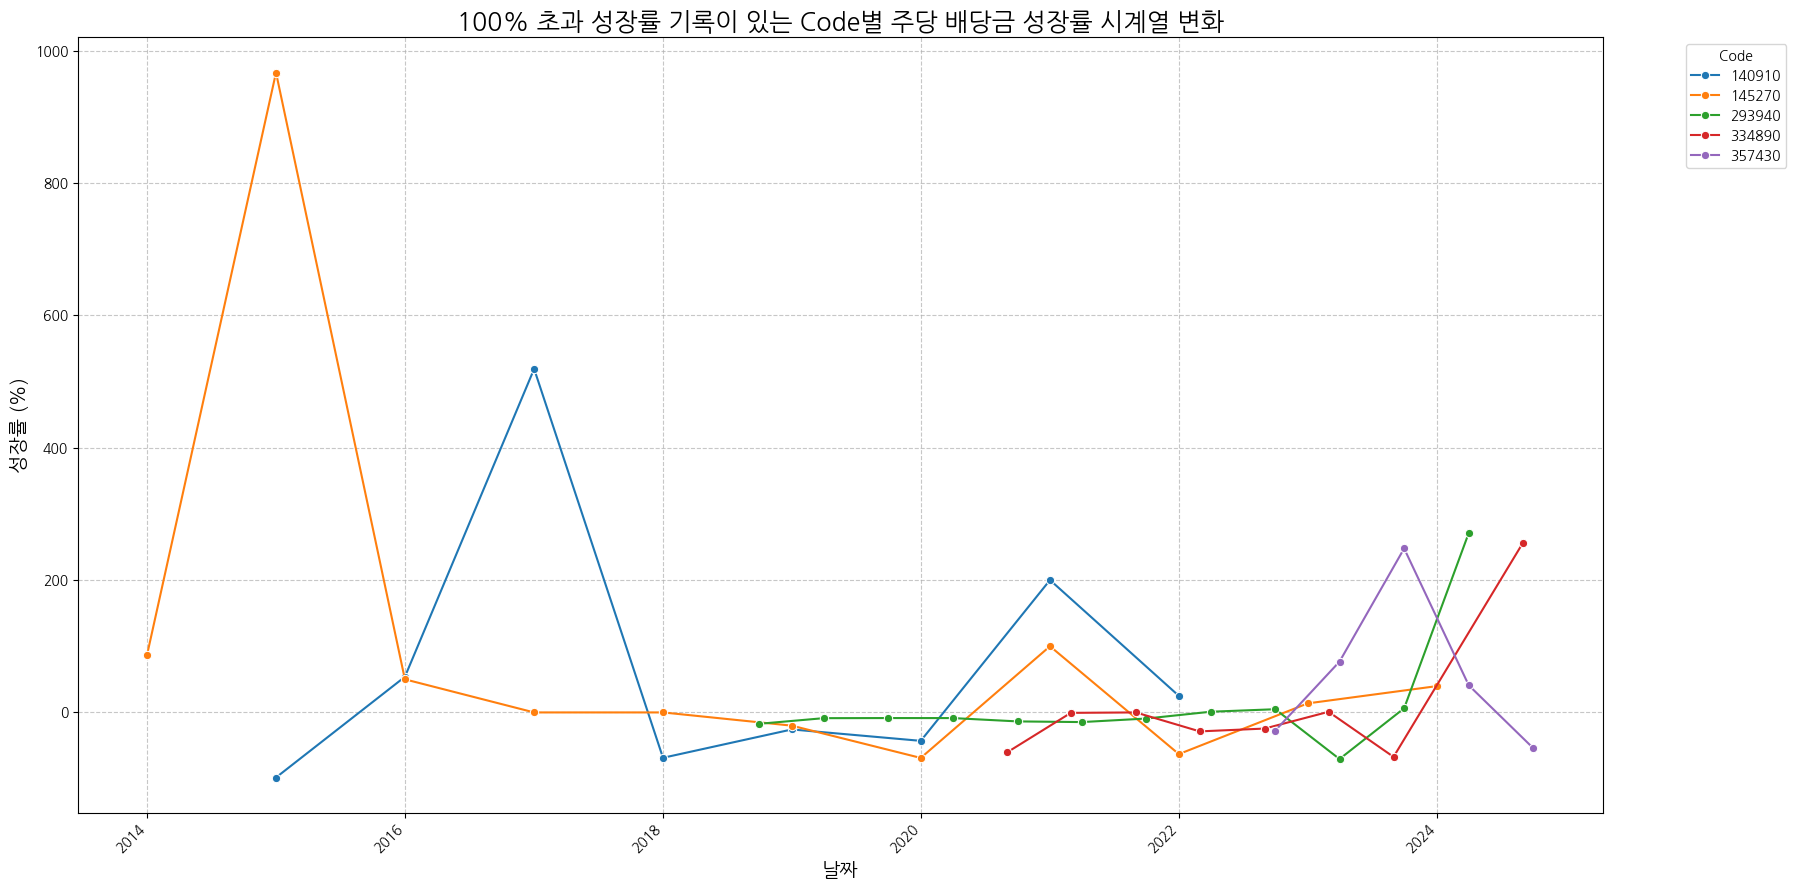

In [34]:
plt.figure(figsize=(18, 9))
sns.lineplot(x='date', y='div_growth_rate', hue='code', data=df_growth_over_100_percent, marker='o')

plt.title('100% 초과 성장률 기록이 있는 Code별 주당 배당금 성장률 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

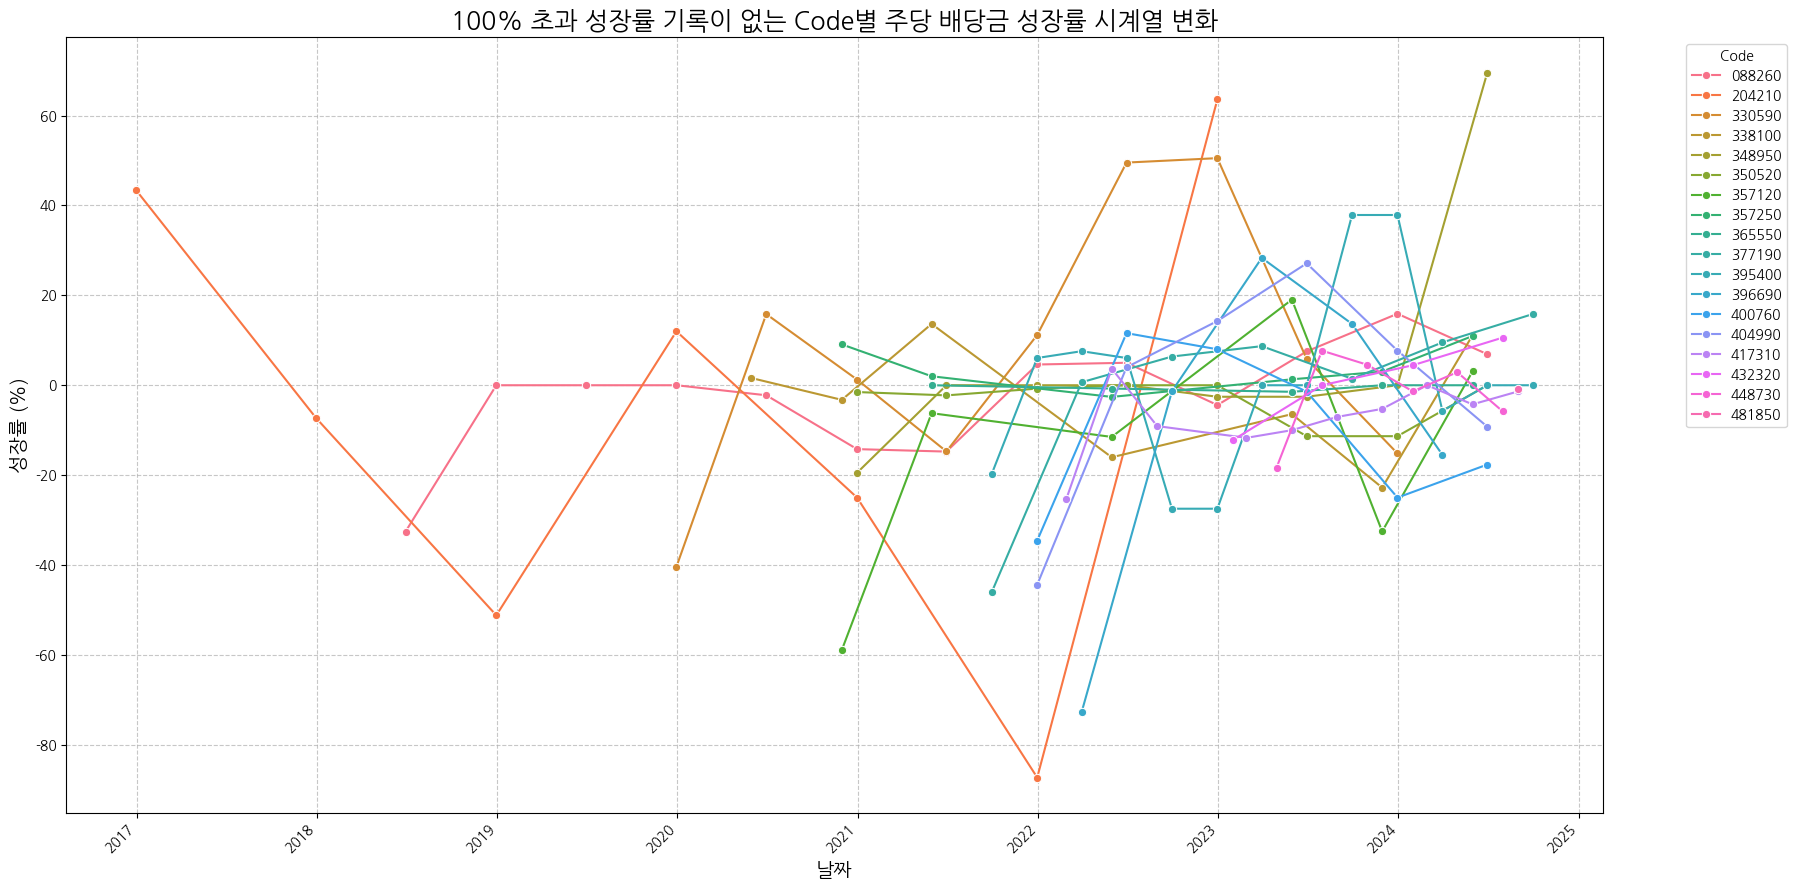

In [35]:
plt.figure(figsize=(18, 9))
sns.lineplot(x='date', y='div_growth_rate', hue='code', data=df_growth_not_over_100_percent, marker='o')

plt.title('100% 초과 성장률 기록이 없는 Code별 주당 배당금 성장률 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 시인성 개선

### Calculate Overall Market Trend (Average/Median Growth Rate)

Calculate the average and median 'div_growth_rate' across all 'code's using the 'df_merged' DataFrame, excluding NaN values.


In [40]:
overall_avg_growth_rate = df_merged['div_growth_rate'].dropna().mean()
overall_median_growth_rate = df_merged['div_growth_rate'].dropna().median()

print(f"Overall Average Dividend Growth Rate: {overall_avg_growth_rate:.2f}%")
print(f"Overall Median Dividend Growth Rate: {overall_median_growth_rate:.2f}%")

Overall Average Dividend Growth Rate: 11.11%
Overall Median Dividend Growth Rate: 0.00%


### Visualize Overall Market Trend (Average/Median Growth Rate)

Visualize the overall market's average and median 'div_growth_rate' over time using a line plot.


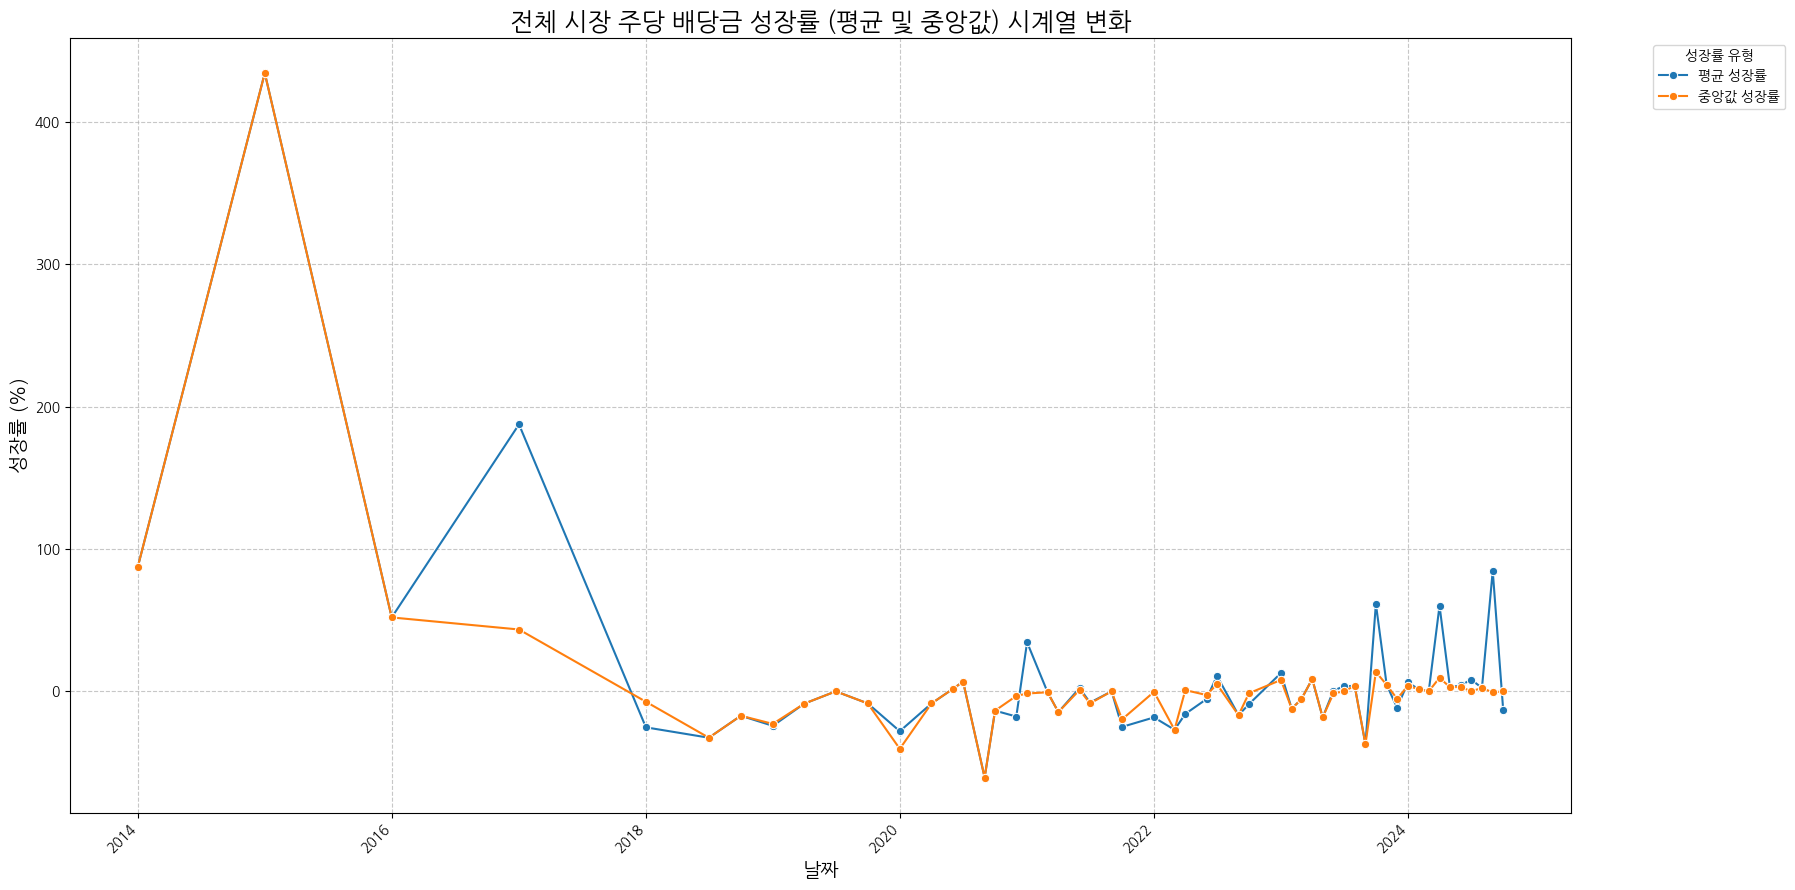

In [41]:
daily_growth_rates = df_merged.groupby('date')['div_growth_rate'].agg(['mean', 'median']).reset_index()
daily_growth_rates = daily_growth_rates.rename(columns={'mean': 'average_growth_rate', 'median': 'median_growth_rate'})

plt.figure(figsize=(18, 9))
sns.lineplot(x='date', y='average_growth_rate', data=daily_growth_rates, label='평균 성장률', marker='o')
sns.lineplot(x='date', y='median_growth_rate', data=daily_growth_rates, label='중앙값 성장률', marker='o')

plt.title('전체 시장 주당 배당금 성장률 (평균 및 중앙값) 시계열 변화', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('성장률 (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='성장률 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Visualize Individual Company Stories (Small Multiples)

df_merged DataFrame을 사용하여 각 'code'별 'div_growth_rate' 시계열을 작은 멀티플(subplots grid) 형태로 시각화합니다. 각 서브플롯은 하나의 'code'에 대한 성장률 추이를 보여주며, 제목, 축 라벨 등을 명확히 합니다.


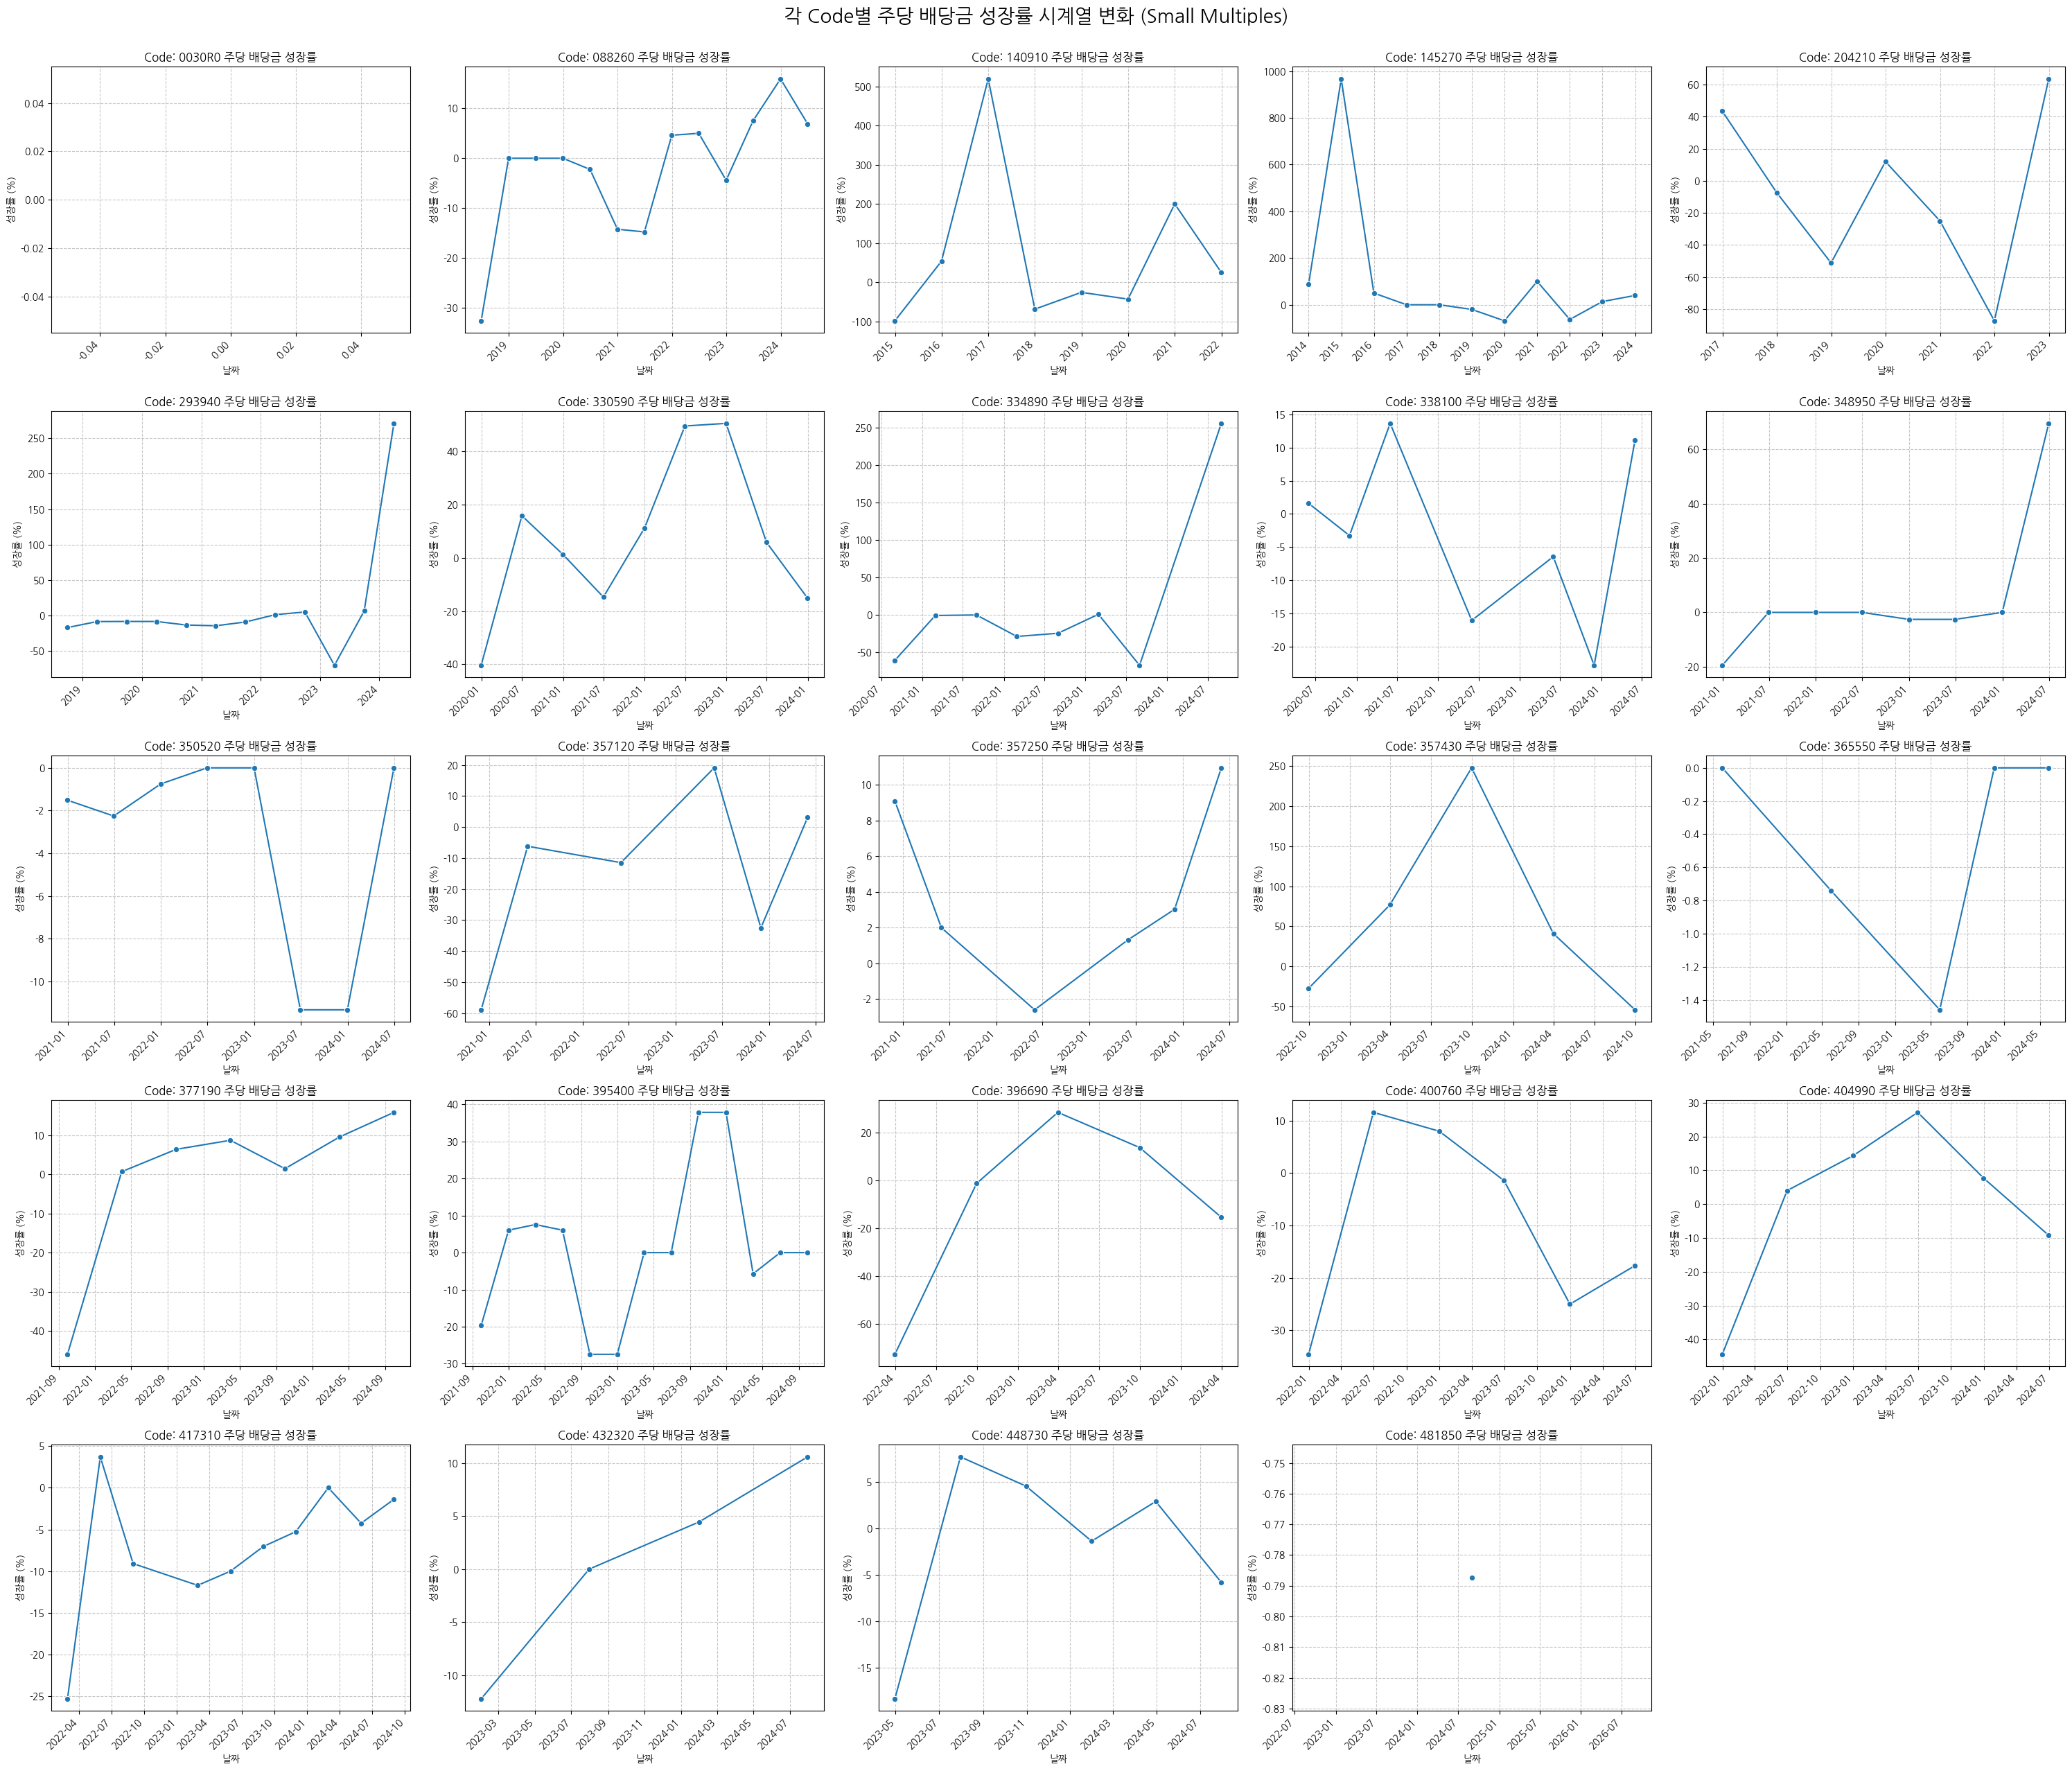

In [42]:
unique_codes = df_merged['code'].unique()

# Calculate grid dimensions (e.g., square or close to square)
num_codes = len(unique_codes)
num_cols = int(np.ceil(np.sqrt(num_codes))) # Number of columns for the subplot grid
num_rows = int(np.ceil(num_codes / num_cols)) # Number of rows for the subplot grid

plt.figure(figsize=(num_cols * 6, num_rows * 5)) # Adjust figure size dynamically

for i, code in enumerate(unique_codes):
    ax = plt.subplot(num_rows, num_cols, i + 1) # Create subplot

    # Filter data for the current code and drop NaN growth rates
    code_data = df_merged[df_merged['code'] == code].dropna(subset=['div_growth_rate'])

    # Plot line chart
    sns.lineplot(x='date', y='div_growth_rate', data=code_data, marker='o', ax=ax)

    # Set title and labels for the subplot
    ax.set_title(f'Code: {code} 주당 배당금 성장률', fontsize=12)
    ax.set_xlabel('날짜', fontsize=10)
    ax.set_ylabel('성장률 (%)', fontsize=10)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')
    ax.grid(axis='both', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.suptitle('각 Code별 주당 배당금 성장률 시계열 변화 (Small Multiples)', fontsize=20, y=1.02) # Overall title
plt.show() # Display the plot

### Calculate Growth vs. Stability Metrics

df_merged DataFrame을 사용하여 각 'code'별 'div_growth_rate'의 평균(성장성)과 표준편차(변동성)를 계산합니다. 이 두 가지 메트릭을 포함하는 새로운 DataFrame을 생성합니다.


In [43]:
growth_stability_metrics = df_merged.groupby('code')['div_growth_rate'].agg(['mean', 'std']).reset_index()
growth_stability_metrics = growth_stability_metrics.rename(columns={'mean': 'mean_div_growth_rate', 'std': 'std_div_growth_rate'})

display(growth_stability_metrics.head())

code  mean_div_growth_rate  std_div_growth_rate
0  0030R0                   NaN                  NaN
1  088260             -2.172886            12.408309
2  140910             70.286174           203.620433
3  145270            100.531254           292.281293
4  204210             -7.397749            52.607046

### Visualize Growth vs. Stability (Scatter Plot)

이전 단계에서 계산된 각 'code'의 '평균 배당 성장률'을 X축으로, '배당 성장률의 표준편차'를 Y축으로 하는 산점도를 생성합니다. 각 점은 개별 'code'를 나타내며, 차트를 4분면으로 나누어 고성장-고안정 등 각 유형의 기업을 파악할 수 있도록 합니다. 적절한 제목, 축 라벨, 범례 및 그리드를 포함합니다.


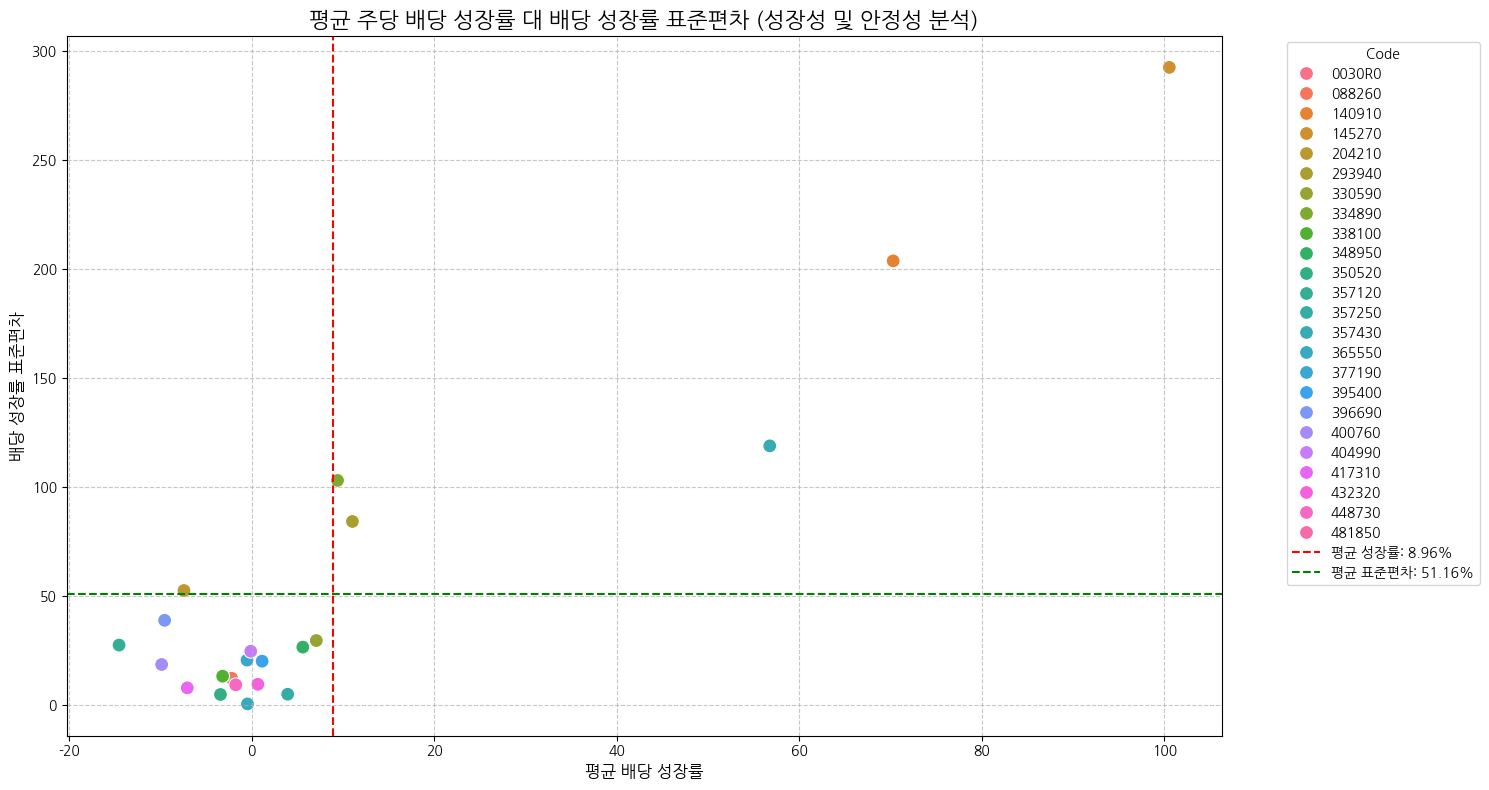

In [44]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='mean_div_growth_rate', y='std_div_growth_rate', hue='code', data=growth_stability_metrics, s=100)

# Calculate mean of mean_div_growth_rate and std_div_growth_rate for quadrant lines
mean_growth = growth_stability_metrics['mean_div_growth_rate'].mean()
mean_std = growth_stability_metrics['std_div_growth_rate'].mean()

# Add quadrant lines
plt.axvline(x=mean_growth, color='r', linestyle='--', label=f'평균 성장률: {mean_growth:.2f}%')
plt.axhline(y=mean_std, color='g', linestyle='--', label=f'평균 표준편차: {mean_std:.2f}%')

# 플롯 제목 및 축 라벨 설정
plt.title('평균 주당 배당 성장률 대 배당 성장률 표준편차 (성장성 및 안정성 분석)', fontsize=16)
plt.xlabel('평균 배당 성장률', fontsize=12)
plt.ylabel('배당 성장률 표준편차', fontsize=12)

plt.grid(axis='both', linestyle='--', alpha=0.7) # 그리드 추가
plt.legend(title='Code', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 추가 및 위치 조정
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 플롯 표시